In [ ]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import re
#PATH PROCESS
import os

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import GridSearchCV, cross_val_score

from xgboost import XGBRegressor
from lightgbm import  LGBMRegressor
from catboost import  CatBoostRegressor
import lightgbm as lgb
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import StratifiedKFold
from collections import Counter
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.metrics import mean_squared_error, r2_score

#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)
import warnings

import optuna

In [ ]:
os.getcwd()

'C:\\Users\\pedne\\Python\\Competition\\machinehack'

In [ ]:
os.chdir('C:\\Users\\pedne\\Python\\Competition\\machinehack')

In [ ]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [ ]:
train_data = pd.read_csv('C:\\Users\\pedne\\Python\\Competition\\machinehack\\train.csv')
test_data  = pd.read_csv('C:\\Users\\pedne\\Python\\Competition\\machinehack\\test.csv')

#Shape of train and test
print('There are {} rows and {} columns in train'.format(train_data.shape[0],train_data.shape[1]))
print('There are {} rows and {} columns in train'.format(test_data.shape[0],test_data.shape[1]))

There are 87864 rows and 9 columns in train
There are 37656 rows and 8 columns in train


In [ ]:
#Prepare submission File
submission = pd.DataFrame()

In [ ]:
train_data.head()

Item_ID     Item_W      Item_Type    Item_MRP Outlet_ID  Outlet_Year  \
0   FDU32  21.027499   Baking Goods  197.352319    OUT046         2004   
1   NCT54  21.102371           Meat  148.250214    OUT035         1987   
2   FDW08  20.882263    Hard Drinks  205.465010    OUT035         1999   
3   FDJ22  21.050435  Starchy Foods  253.417583    OUT046         1996   
4   FDF47  21.247876   Baking Goods  240.871039    OUT035         1988   

  Outlet_Size Outlet_Location_Type        Sales  
0       Small               Tier 2  2689.457781  
1       Small               Tier 1  3437.350375  
2       Small               Tier 3  3129.967268  
3       Small               Tier 1  1306.514376  
4       Small               Tier 3  1739.769829

In [ ]:
test_data.head()

Item_ID     Item_W           Item_Type    Item_MRP Outlet_ID  Outlet_Year  \
0   DRM23  10.156725         Snack Foods  119.319482    OUT013         1999   
1   FDG47  10.434425           Household  263.600449    OUT018         1987   
2   FDN21  11.953589  Health and Hygiene  246.286990    OUT018         1997   
3   FDZ23  14.948546               Dairy  136.200508    OUT046         2004   
4   FDC16  11.080042              Canned  173.145664    OUT018         2009   

  Outlet_Size Outlet_Location_Type  
0        High               Tier 3  
1        High               Tier 3  
2        High               Tier 1  
3      Medium               Tier 2  
4      Medium               Tier 3

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87864 entries, 0 to 87863
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_ID               87864 non-null  object 
 1   Item_W                87864 non-null  float64
 2   Item_Type             87864 non-null  object 
 3   Item_MRP              87864 non-null  float64
 4   Outlet_ID             87864 non-null  object 
 5   Outlet_Year           87864 non-null  int64  
 6   Outlet_Size           87864 non-null  object 
 7   Outlet_Location_Type  87864 non-null  object 
 8   Sales                 87864 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.0+ MB


In [ ]:
train_data.describe(include='all')

Item_ID        Item_W     Item_Type      Item_MRP Outlet_ID  \
count    87864  87864.000000         87864  87864.000000     87864   
unique     895           NaN            16           NaN         5   
top      FDE11           NaN  Baking Goods           NaN    OUT035   
freq       419           NaN         14666           NaN     24071   
mean       NaN     15.591469           NaN    151.242943       NaN   
std        NaN      4.364429           NaN     59.536366       NaN   
min        NaN      7.992700           NaN     32.910015       NaN   
25%        NaN     10.968658           NaN    112.423337       NaN   
50%        NaN     15.831170           NaN    145.581473       NaN   
75%        NaN     19.969936           NaN    197.110367       NaN   
max        NaN     21.250000           NaN    265.214271       NaN   

        Outlet_Year Outlet_Size Outlet_Location_Type         Sales  
count   87864.00000       87864                87864  87864.000000  
unique          NaN           3                    3           NaN  
top             NaN       Small               Tier 1           NaN  
freq            NaN       48614                33567           NaN  
mean     1999.87063         NaN                  NaN   1911.842120  
std         6.63429         NaN                  NaN   1291.386004  
min      1987.00000         NaN                  NaN  -1229.360345  
25%      1997.00000         NaN                  NaN    959.249675  
50%      1999.00000         NaN                  NaN   1606.307877  
75%      2004.00000         NaN                  NaN   2608.057736  
max      2009.00000         NaN                  NaN  10309.283310

In [ ]:
#get all the columns with catagorical values
cat_columns = list(test_data.select_dtypes(['object']).columns)

[(col, test_data[col].unique()) for col in cat_columns]

[('Item_ID',
  array(['DRM23', 'FDG47', 'FDN21', 'FDZ23', 'FDC16', 'NCE07', 'FDH27',
         'FDL13', 'NCX30', 'FDR35', 'FDZ49', 'NCO02', 'FDX09', 'FDA02',
         'FDD14', 'FDI08', 'DRN47', 'FDR21', 'DRL11', 'DRM47', 'FDV55',
         'FDX03', 'FDD40', 'FDU34', 'FDN09', 'FDY14', 'FDC59', 'FDD51',
         'NCR05', 'FDN12', 'FDL16', 'FDT25', 'FDQ59', 'NCR41', 'FDU10',
         'NCY06', 'FDV08', 'FDB38', 'FDV34', 'NCM05', 'FDN56', 'FDN46',
         'FDU36', 'FDP25', 'FDM24', 'FDZ09', 'NCP41', 'NCL18', 'FDV45',
         'FDE11', 'FDD08', 'FDE34', 'FDM08', 'FDB56', 'FDZ55', 'FDS19',
         'FDR32', 'FDP44', 'FDX23', 'FDY47', 'NCL31', 'FDR02', 'FDX33',
         'FDC56', 'FDQ58', 'FDN23', 'FDX15', 'FDW12', 'FDO24', 'NCX54',
         'FDS11', 'FDK52', 'DRG25', 'FDV46', 'DRI03', 'FDO09', 'FDI15',
         'NCO53', 'FDG26', 'FDX47', 'NCG07', 'FDU08', 'FDY19', 'FDS04',
         'FDR01', 'FDT24', 'DRK49', 'FDC39', 'DRP47', 'FDS55', 'FDF52',
         'DRM59', 'DRE12', 'FDY51', 'FDH46', 'FDS28

In [ ]:
train_data['Outlet_Year']  = train_data['Outlet_Year'].astype('object')
test_data['Outlet_Year']   = test_data['Outlet_Year'].astype('object')

In [ ]:
train_cat=test_data.select_dtypes(include='object')
train_cat.drop(columns = 'Item_ID',axis=1,inplace=True)
train_cat.columns

C:\Users\pedne\anaconda3\envs\tg4\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Index(['Item_Type', 'Outlet_ID', 'Outlet_Year', 'Outlet_Size',
       'Outlet_Location_Type'],
      dtype='object')

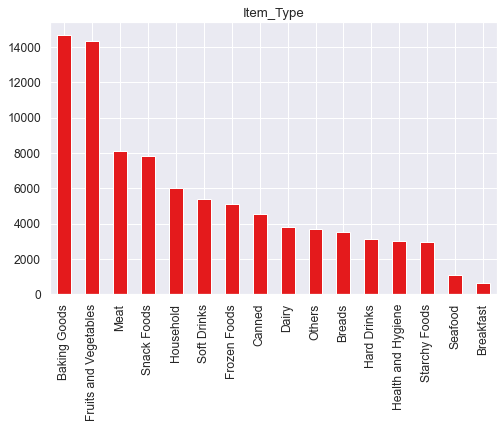

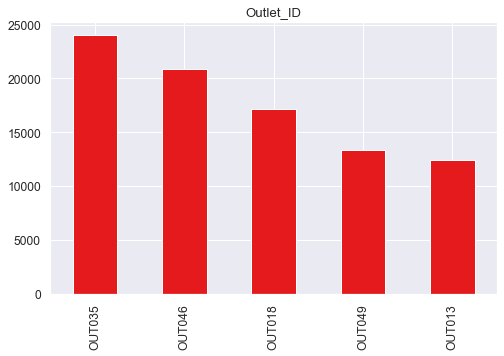

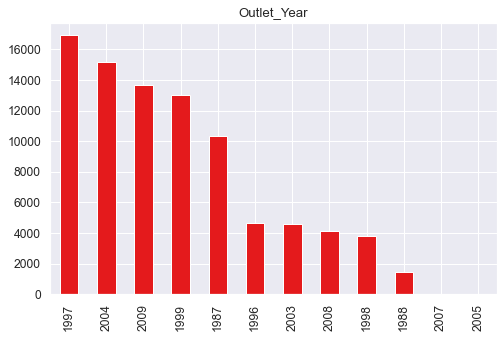

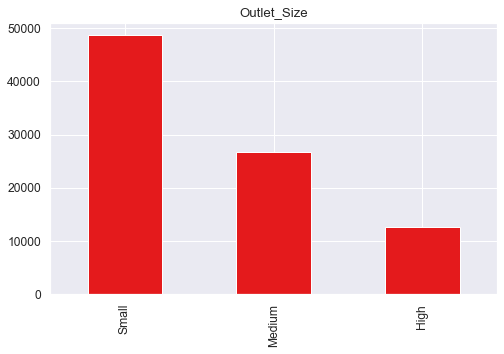

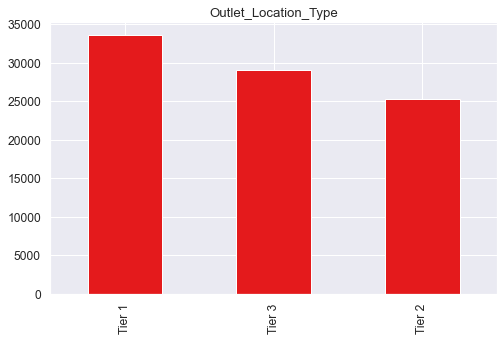

In [ ]:
sns.set(style='darkgrid', palette="Set1", font_scale=1.1, rc={"figure.figsize": [8, 5]})
for i in train_cat.columns:
    train_data[i].value_counts().plot.bar()
    plt.title('{0}'.format(i))
    plt.show()

In [ ]:
train_numeric=train_data.select_dtypes(include=['int64','float64'])
train_numeric.columns

Index(['Item_W', 'Item_MRP', 'Sales'], dtype='object')

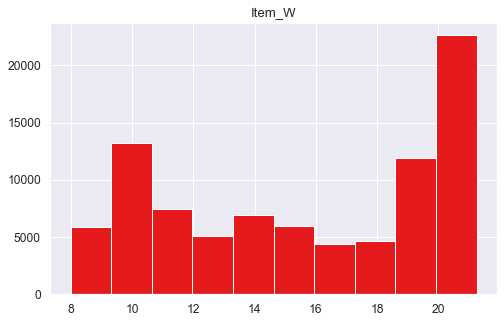

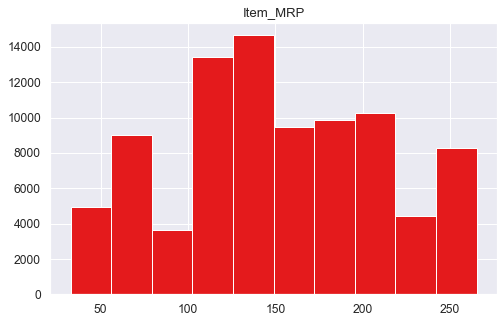

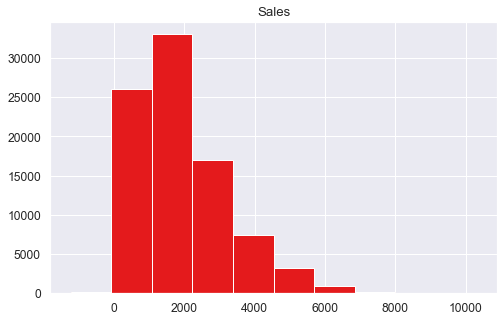

In [ ]:
for i in train_numeric.columns:
    plt.hist(train_data[i])
    plt.title('{0}'.format(i))
    plt.show()

In [ ]:
train_numeric.corr()

Item_W  Item_MRP     Sales
Item_W    1.000000 -0.022830  0.000615
Item_MRP -0.022830  1.000000  0.014813
Sales     0.000615  0.014813  1.000000

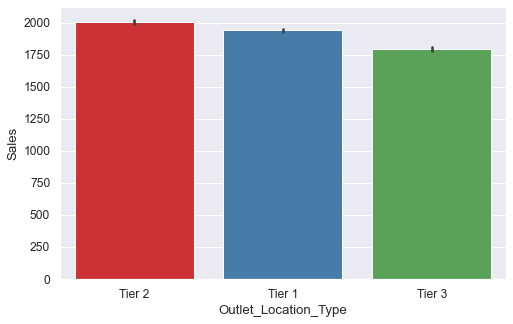

In [ ]:
sns.barplot(x='Outlet_Location_Type', y='Sales', data=train_data)
plt.show()

In [ ]:
['Item_Type', 'Outlet_ID', 'Outlet_Year', 'Outlet_Size',
       'Outlet_Location_Type'],

(['Item_Type',
  'Outlet_ID',
  'Outlet_Year',
  'Outlet_Size',
  'Outlet_Location_Type'],)

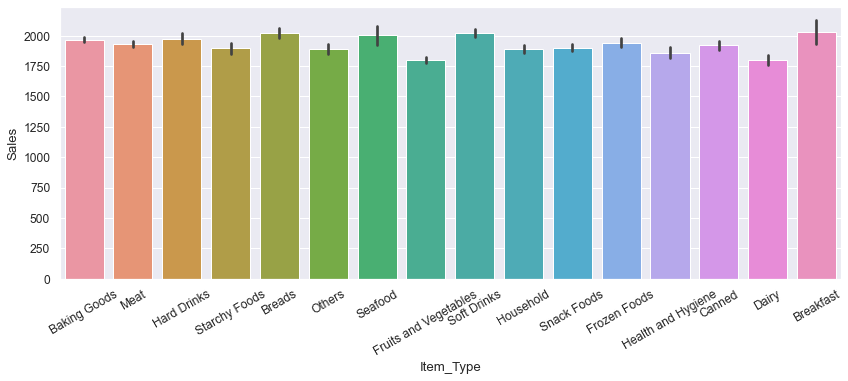

In [ ]:
sns.set(style='darkgrid', palette="Set1", font_scale=1.1, rc={"figure.figsize": [14, 5]})
sns.barplot(x='Item_Type', y='Sales', data=train_data)
plt.xticks(rotation=30)
plt.show()

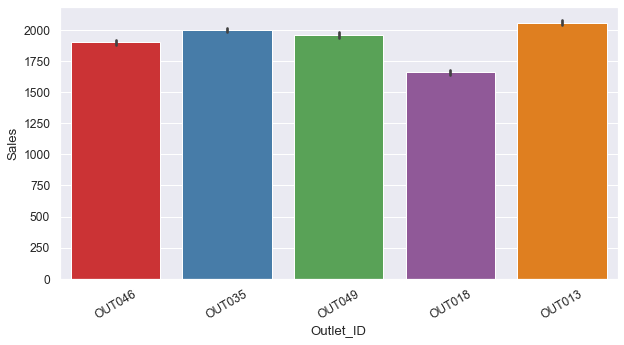

In [ ]:
sns.set(style='darkgrid', palette="Set1", font_scale=1.1, rc={"figure.figsize": [10, 5]})
sns.barplot(x='Outlet_ID', y='Sales', data=train_data)
plt.xticks(rotation=30)
plt.show()

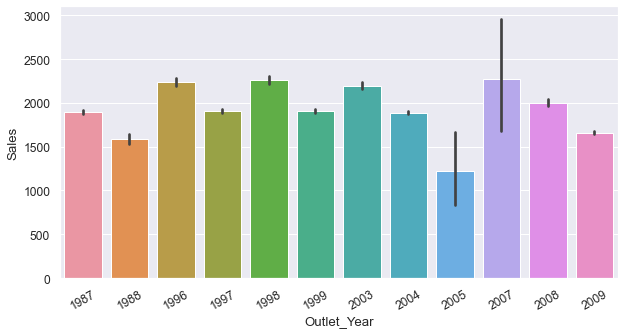

In [ ]:
sns.set(style='darkgrid', palette="plasma", font_scale=1.1, rc={"figure.figsize": [10, 5]})
sns.barplot(x='Outlet_Year', y='Sales', data=train_data)
plt.xticks(rotation=30)
plt.show()

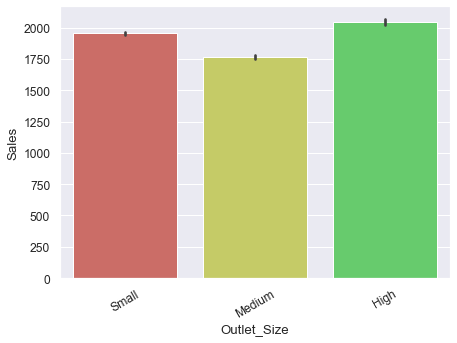

In [ ]:
sns.set(style='darkgrid', palette="hls", font_scale=1.1, rc={"figure.figsize": [7, 5]})
sns.barplot(x='Outlet_Size', y='Sales', data=train_data)
plt.xticks(rotation=30)
plt.show()

In [ ]:
#Removes train rows which has Item_ID not present in test set
test_Item_ID_list=test_data['Item_ID'].tolist()
train_data=train_data[train_data['Item_ID'].isin(test_Item_ID_list)]

In [ ]:
set(test_data.Item_ID).difference(set(train_data.Item_ID))

{'FDW34'}

In [ ]:
test_data[test_data['Item_ID'] == 'FDW34']

Item_ID    Item_W              Item_Type    Item_MRP Outlet_ID  \
5964    FDW34  8.764597                   Meat   72.068654    OUT046   
11376   FDW34  9.526708  Fruits and Vegetables  190.117902    OUT013   
35921   FDW34  9.600000            Snack Foods  244.817000    OUT035   

      Outlet_Year Outlet_Size Outlet_Location_Type  
5964         2004       Small               Tier 1  
11376        1998       Small               Tier 1  
35921        2004       Small               Tier 2

In [ ]:
test_data[test_data['Item_ID'] == 'FDW35']

Item_ID     Item_W              Item_Type    Item_MRP Outlet_ID  \
407     FDW35   9.208549            Snack Foods  128.911494    OUT049   
1453    FDW35  13.173489                  Dairy  209.120897    OUT049   
1512    FDW35  19.081514            Snack Foods  224.816532    OUT018   
2101    FDW35  10.079658           Frozen Foods  202.202004    OUT013   
3850    FDW35  16.207523                 Canned  126.045485    OUT046   
6071    FDW35   8.558092     Health and Hygiene  234.756799    OUT013   
6154    FDW35   8.799805              Household  208.545704    OUT013   
7316    FDW35  10.508515              Household  100.879544    OUT035   
8011    FDW35  16.360424                  Dairy   62.556702    OUT049   
8343    FDW35  19.024965     Health and Hygiene   53.578276    OUT046   
9164    FDW35  11.023074              Household  113.770031    OUT013   
11288   FDW35  15.402026  Fruits and Vegetables  121.104306    OUT046   
11968   FDW35  16.179902            Soft Drinks  114.140253    OUT013   
14179   FDW35  14.489018  Fruits and Vegetables  165.974794    OUT013   
14925   FDW35   9.764584  Fruits and Vegetables  136.223043    OUT035   
15416   FDW35   9.884660            Snack Foods   78.293212    OUT035   
16116   FDW35   9.289933           Frozen Foods   50.477869    OUT013   
16378   FDW35  10.628390            Soft Drinks  124.002792    OUT046   
16625   FDW35  19.053085            Soft Drinks  172.808504    OUT035   
17548   FDW35  19.313897              Household  193.593834    OUT018   
17862   FDW35  19.594131                   Meat  125.916243    OUT018   
17887   FDW35  19.481630                   Meat  184.890296    OUT046   
18126   FDW35  20.307754           Baking Goods  155.329737    OUT018   
18194   FDW35  19.983523                   Meat  211.301171    OUT035   
18709   FDW35  14.387410                 Canned  114.886034    OUT035   
19116   FDW35  15.338005            Snack Foods  139.343491    OUT013   
20717   FDW35  18.189620     Health and Hygiene   98.887675    OUT046   
21121   FDW35  21.242974                  Dairy  129.237670    OUT035   
24766   FDW35  16.820241           Frozen Foods  118.344318    OUT018   
24847   FDW35  12.479978            Snack Foods  126.554673    OUT013   
25082   FDW35  18.779183              Household   57.088848    OUT049   
26592   FDW35  10.502482                 Canned   51.498566    OUT013   
26761   FDW35  10.734179            Snack Foods   66.186585    OUT018   
26878   FDW35  13.048121              Household   98.036724    OUT013   
28227   FDW35   8.919069                 Canned  201.586073    OUT018   
28240   FDW35  12.340907            Snack Foods  201.228682    OUT035   
30265   FDW35  10.600000                 Breads   41.445400    OUT035   
30362   FDW35  10.600000                 Breads   42.845400    OUT018   
33739   FDW35  12.461849            Snack Foods  129.679068    OUT018   
34384   FDW35   8.700104            Snack Foods  126.500346    OUT035   
35798   FDW35   7.693543            Snack Foods  197.513541    OUT049   
36949   FDW35   7.063397            Snack Foods  133.128403    OUT035   

      Outlet_Year Outlet_Size Outlet_Location_Type  
407          1999      Medium               Tier 1  
1453         1998      Medium               Tier 3  
1512         1996      Medium               Tier 1  
2101         1997        High               Tier 2  
3850         1997      Medium               Tier 1  
6071         2009        High               Tier 3  
6154         1999        High               Tier 3  
7316         1997        High               Tier 1  
8011         1997      Medium               Tier 1  
8343         1999        High               Tier 1  
9164         1999        High               Tier 3  
11288        1997       Small               Tier 1  
11968        1998      Medium               Tier 3  
14179        1987      Medium               Tier 1  
14925        1999      Medium               Tier 2  
15416        2004 

In [ ]:
test_data['Item_ID'].replace(to_replace ="FDW34",value ="FDW35", inplace=True) 

In [ ]:
#Lets describe train
train_data.describe()

Item_W      Item_MRP         Sales
count  87851.000000  87851.000000  87851.000000
mean      15.591483    151.243690   1911.832518
std        4.364408     59.535897   1291.367472
min        7.992700     32.910015  -1229.360345
25%       10.968710    112.424216    959.326089
50%       15.831008    145.581527   1606.321540
75%       19.969907    197.109290   2607.948437
max       21.250000    265.214271  10309.283310

#Sales has negative values : To be replaced with 0 & identify how many rows are below 0

<AxesSubplot:xlabel='Item_W', ylabel='Sales'>

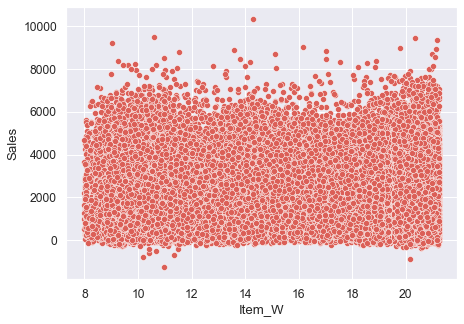

In [ ]:
sns.scatterplot(x=train_data['Item_W'],y=train_data['Sales'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_W'>

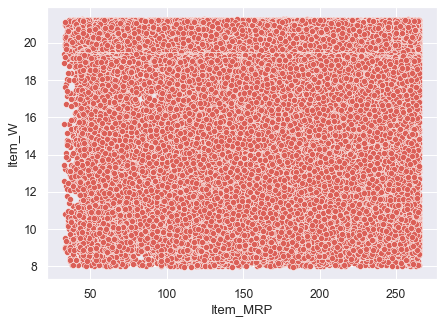

In [ ]:
sns.scatterplot(x=train_data['Item_MRP'],y=train_data['Item_W'])

In [ ]:
#train_data[(train_data['Sales'] > 0) & (train_data['Sales'] <1)]

train_data[(train_data['Sales'] <1)]

Item_ID     Item_W              Item_Type    Item_MRP Outlet_ID  \
102     FDI14  20.996995                   Meat  191.974325    OUT046   
133     FDZ52  20.873340                 Others  149.528575    OUT049   
892     FDN12  20.407615          Starchy Foods  110.410412    OUT049   
976     DRE48  20.004882            Hard Drinks  142.408146    OUT049   
1179    FDA39  19.945005           Baking Goods  176.576055    OUT035   
1366    FDY57  20.166809           Baking Goods  253.539616    OUT049   
1679    DRJ24  20.505480            Hard Drinks  255.427274    OUT049   
2527    NCO30  20.648320           Baking Goods  179.052738    OUT046   
2981    DRF25  20.157217           Baking Goods  186.424150    OUT046   
3407    FDA04  21.141561                   Meat  240.254676    OUT035   
3856    FDI15  21.116563                 Breads   57.105652    OUT035   
4170    FDX22  20.448873                   Meat  250.406900    OUT035   
4447    FDJ16  20.533232           Baking Goods  194.951097    OUT013   
4637    FDL51  20.210464           Baking Goods  206.645391    OUT018   
5548    FDG21  20.320288           Baking Goods  263.776637    OUT018   
5609    NCQ06  20.397883           Baking Goods   77.252980    OUT046   
5652    FDY01  20.267369                   Meat   88.521825    OUT035   
5657    FDP08  19.960617          Starchy Foods   73.688526    OUT035   
5681    FDH47  20.425982           Baking Goods   56.577014    OUT046   
5747    FDO58  20.745272                 Others   51.528642    OUT035   
5842    NCE18  20.313472                   Meat   96.279436    OUT046   
6040    FDA34  20.468832  Fruits and Vegetables  103.438790    OUT049   
6148    FDX58  19.723621  Fruits and Vegetables  156.759152    OUT035   
6703    FDK34  21.177410                Seafood   61.112344    OUT018   
6772    FDO27  20.943834  Fruits and Vegetables   59.830616    OUT049   
6776    FDX33  20.953293                   Meat   56.853434    OUT035   
7031    DRF25  21.099978  Fruits and Vegetables  107.233575    OUT018   
7050    FDP07  20.936301  Fruits and Vegetables  253.511015    OUT018   
7140    FDY51  21.161772  Fruits and Vegetables  115.304680    OUT018   
7528    FDU34  20.155181          Starchy Foods  129.625153    OUT018   
7534    FDS01  20.077516                   Meat  131.028785    OUT049   
7976    FDD50  20.483966                   Meat   59.786696    OUT049   
8740    FDS16  21.137700            Soft Drinks  151.406345    OUT013   
8804    FDO39  21.198563  Fruits and Vegetables   47.364426    OUT018   
8831    FDB46  20.876543  Fruits and Vegetables   65.323675    OUT018   
8854    FDA04  20.859550  Fruits and Vegetables   49.929048    OUT018   
9459    FDA28  20.993507           Frozen Foods  215.772485    OUT046   
9462    FDB12  21.239445                  Dairy  170.573530    OUT035   
9666    DRH51  21.063976              Household  123.860289    OUT046   
10025   FDM39  20.175254  Fruits and Vegetables  232.349161    OUT018   
10915   NCT41  21.204551     Health and Hygiene  253.464580    OUT046   
11143   FDH46  20.546217  Fruits and Vegetables  105.328920    OUT018   
11632   FDQ21  19.942914            Soft Drinks  133.691009    OUT018   
11960   FDV38  20.121492  Fruits and Vegetables   46.448958    OUT018   
12247   FDE17  20.408347                  Dairy  202.750916    OUT013   
12506   FDF56  19.907918            Snack Foods  110.000314    OUT013   
12594   FDL34  19.561272     Health and Hygiene  130.915575    OUT046   
12720   NCI42  20.615387           Frozen Foods  119.576854    OUT013   
12777   FDH53  19.597414            Snack Foods  163.768684    OUT035   
12802   FDR59  20.661986     Health and Hygiene  242.441640    OUT035   
13245   FDO32  20.578350              Household  129.556179    OUT035   
13429   FDU34  19.776088                  Dairy  195.929553    OUT046   
13491   FDI57  20.742196           Frozen Foods  232.396270    OUT046   
13519   FDA04  20.601960            Snack Foods  243.699548    O

In [ ]:
train_data["Sales"].describe()

count    87851.000000
mean      1911.832518
std       1291.367472
min      -1229.360345
25%        959.326089
50%       1606.321540
75%       2607.948437
max      10309.283310
Name: Sales, dtype: float64

In [ ]:
#Identify categorical columns 
train_data_cat=train_data.select_dtypes(include='object')
train_data_cat.columns

Index(['Item_ID', 'Item_Type', 'Outlet_ID', 'Outlet_Year', 'Outlet_Size',
       'Outlet_Location_Type'],
      dtype='object')

In [ ]:
#Identify numerical columns
train_data_num=train_data.select_dtypes(include=['int64','float64'])
list(train_data_num.columns)

['Item_W', 'Item_MRP', 'Sales']

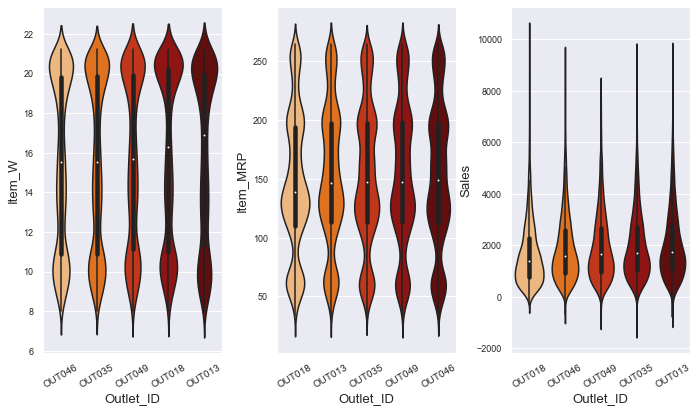

In [ ]:
count = 1
for cols in train_data_num:
    sns.set(style='darkgrid', palette="gist_heat_r", font_scale=1.1, rc={"figure.figsize": [10, 6]})
    plt.subplot(1, 3, count)
    plt.tight_layout()
    #sns.boxenplot(x='Outlet_Type', y= cols, data=data)
    sorted_nb = train_data.groupby(['Outlet_ID'])[cols].median().sort_values()
    sns.violinplot(x=train_data['Outlet_ID'], y=train_data[cols], order=list(sorted_nb.index))
    plt.xticks(rotation=30)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=9)
    
    count+=1

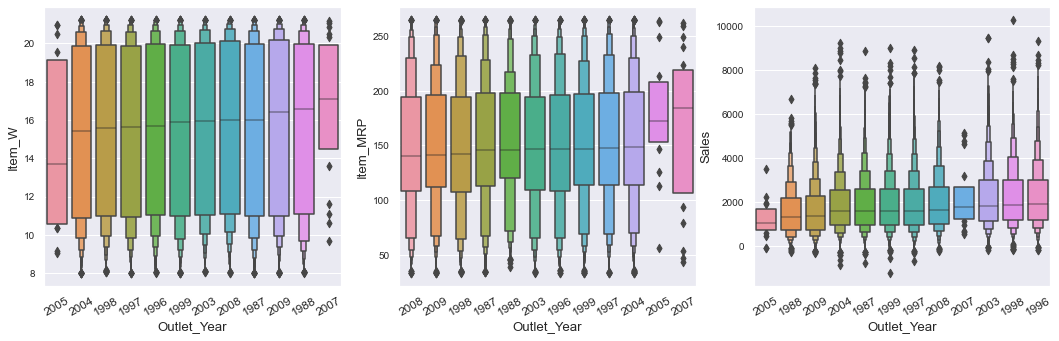

In [ ]:
count = 1
for cols in train_data_num:
    sns.set(style='darkgrid', palette="Set1", font_scale=1.1, rc={"figure.figsize": [15, 5]})
    plt.subplot(1, 3, count)
    plt.tight_layout()
    #sns.boxenplot(x='Outlet_Type', y= cols, data=data)
    sorted_nb = train_data.groupby(['Outlet_Year'])[cols].median().sort_values()
    sns.boxenplot(x=train_data['Outlet_Year'], y=train_data[cols], order=list(sorted_nb.index))
    plt.xticks(rotation=30)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=10)
    
    count+=1

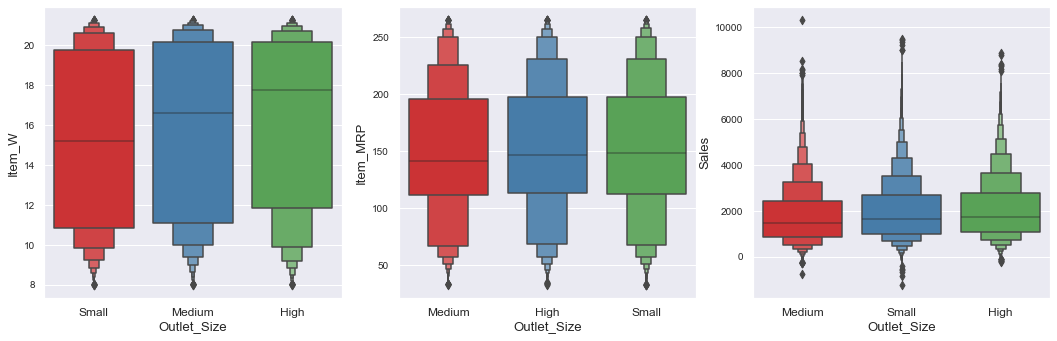

In [ ]:
count = 1
for cols in train_data_num:
    sns.set(style='darkgrid', palette="Set1", font_scale=1.1, rc={"figure.figsize": [15, 5]})
    plt.subplot(1, 3, count)
    plt.tight_layout()
    #sns.boxenplot(x='Outlet_Type', y= cols, data=data)
    sorted_nb = train_data.groupby(['Outlet_Size'])[cols].median().sort_values()
    sns.boxenplot(x=train_data['Outlet_Size'], y=train_data[cols], order=list(sorted_nb.index))
    plt.xticks(rotation=0)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=10)
    
    count+=1

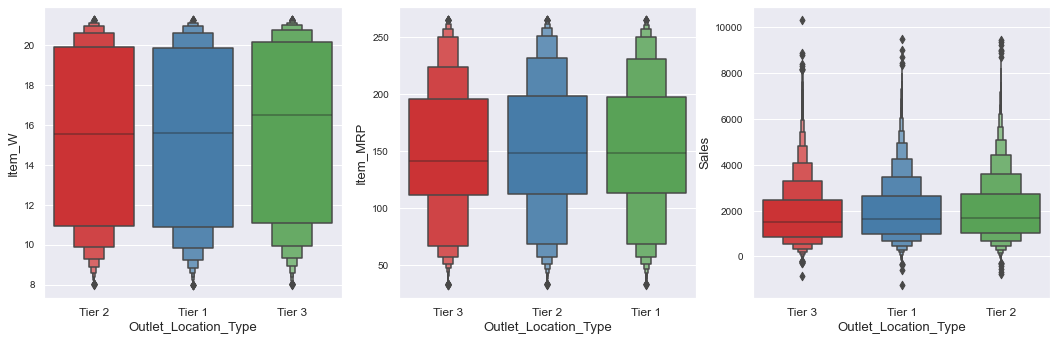

In [ ]:
count = 1
for cols in train_data_num:
    sns.set(style='darkgrid', palette="Set1", font_scale=1.1, rc={"figure.figsize": [15, 5]})
    plt.subplot(1, 3, count)
    plt.tight_layout()
    #sns.boxenplot(x='Outlet_Type', y= cols, data=data)
    sorted_nb = train_data.groupby(['Outlet_Location_Type'])[cols].median().sort_values()
    sns.boxenplot(x=train_data['Outlet_Location_Type'], y=train_data[cols], order=list(sorted_nb.index))
    plt.xticks(rotation=0)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=10)
    
    count+=1

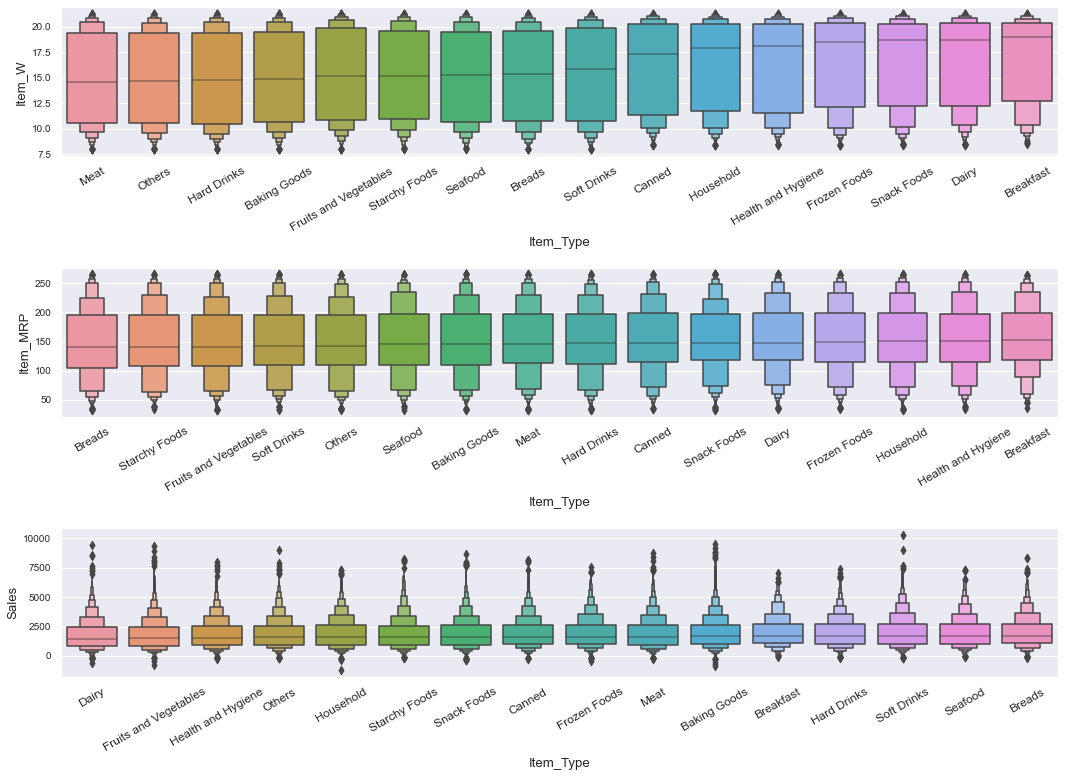

In [ ]:
count = 1
for cols in train_data_num:
    sns.set(style='darkgrid', palette="Set1", font_scale=1.1, rc={"figure.figsize": [15, 10]})
    plt.subplot(3, 1, count)
    plt.tight_layout()
    #sns.boxenplot(x='Outlet_Type', y= cols, data=data)
    sorted_nb = train_data.groupby(['Item_Type'])[cols].median().sort_values()
    sns.boxenplot(x=train_data['Item_Type'], y=train_data[cols], order=list(sorted_nb.index))
    plt.xticks(rotation=30)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=10)
    
    count+=1

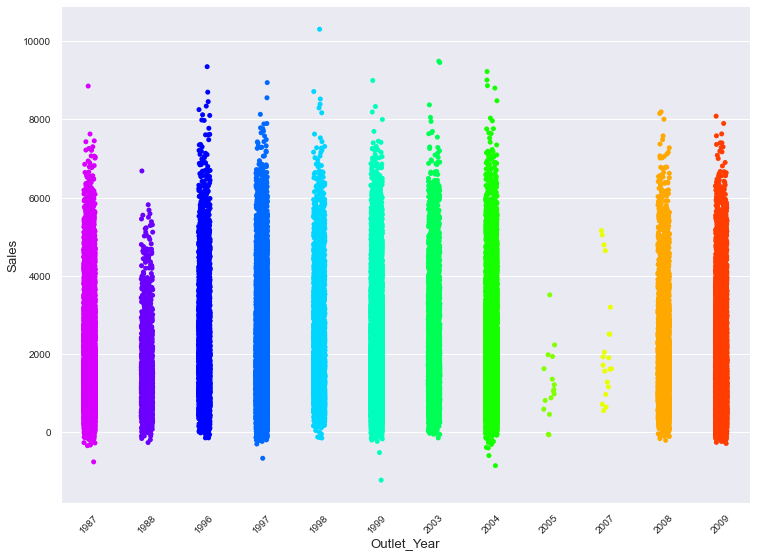

In [ ]:
#Catplot Outlet_Year+Sales

sns.catplot(x='Outlet_Year',y='Sales',kind='strip', data=train_data, palette="gist_rainbow_r", orient = "v")
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=45)
plt.show()

In [ ]:
### Part 1 Starts ###

In [ ]:
train_data['train_or_test']='train'
test_data['train_or_test']='test'

df=pd.concat([train_data,test_data])

print("Combined dataset shape: {0}: ".format(df.shape))

Combined dataset shape: (125507, 10): 


In [ ]:
def preparedatafortraining(df):
    
    train=df.loc[df.train_or_test.isin(['train'])]
    test=df.loc[df.train_or_test.isin(['test'])]
    
    target=['Sales']
    y=train[target]
    
    drop_columns={'Sales','train_or_test',}
    
    train_corr = train.copy()
    
    train=train.drop(columns=drop_columns,axis=1)
    test=test.drop(columns=drop_columns,axis=1)
    
    train_df = pd.get_dummies(train, drop_first = True)
    test_df = pd.get_dummies(test, drop_first = True)
    
    train_corr_df = pd.get_dummies(train_corr, drop_first = True)
    
    print("Train dataset shape: {0}, \nTest dataset shape: {1}".format(train_df.shape, test_df.shape))
  
    return train_df,y,test_df,train_corr_df

In [ ]:
X,y,test,train_corr=preparedatafortraining(df)
print(X.shape)
print(y.shape)
print(test.shape)

Train dataset shape: (87851, 926), 
Test dataset shape: (37656, 926)
(87851, 926)
(87851, 1)
(37656, 926)


In [ ]:
#Prediction - 1 (Default - No Tuning)
from catboost import CatBoostRegressor
from keras.metrics import mean_squared_logarithmic_error
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import PolynomialFeatures

X_train, X_val, Y_train, Y_val = train_test_split(X,y, test_size=0.2, random_state=42)

print (X_train.shape)
print (Y_train.shape)
print ('\n')
print (X_val.shape)
print (Y_val.shape)


# Lets stick to default Hyperparametrs as of now. We shall tune the best model
lin_reg = LinearRegression()
lasso_reg = Lasso()
ElasticNet_reg =  ElasticNet()
xgb = XGBRegressor(random_state= 42)
lgb = LGBMRegressor(random_state= 42)
cb  = CatBoostRegressor(random_state= 42)

def training_predict(trainer, X_train, Y_train, X_test, Y_test):
    scores = {} # Initializing a Dictionary to store evaluation metrics
    
    trainer.fit(X_train, Y_train)  # Training
    Y_pred = trainer.predict(X_test) # Predicts
     
    scores['R2']   = r2_score(Y_test, Y_pred)
    scores['RMSE'] = (np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
    
    return scores

# Ignore the error
predictors = {} # Initializing a dictionary to store training and testing data
for model in [ lin_reg,  lasso_reg, ElasticNet_reg, xgb, lgb, cb  ]: # these are our objects that we instantiated above. We loop through them
    model_name = model.__class__.__name__
    predictors[model_name]  = {}
    predictors[model_name] =  training_predict(model, X_train, Y_train, X_val, Y_val)
    

(70280, 926)
(70280, 1)


(17571, 926)
(17571, 1)
Learning rate set to 0.083203
0:	learn: 1290.0435190	total: 170ms	remaining: 2m 49s
1:	learn: 1288.3049632	total: 210ms	remaining: 1m 44s
2:	learn: 1286.9048767	total: 247ms	remaining: 1m 22s
3:	learn: 1285.7243321	total: 279ms	remaining: 1m 9s
4:	learn: 1284.8095179	total: 297ms	remaining: 59.1s
5:	learn: 1283.8812740	total: 313ms	remaining: 51.8s
6:	learn: 1283.0499453	total: 328ms	remaining: 46.5s
7:	learn: 1282.3241099	total: 343ms	remaining: 42.6s
8:	learn: 1281.4757237	total: 360ms	remaining: 39.6s
9:	learn: 1280.6636243	total: 376ms	remaining: 37.2s
10:	learn: 1280.1759971	total: 391ms	remaining: 35.2s
11:	learn: 1279.6487700	total: 408ms	remaining: 33.6s
12:	learn: 1279.2026638	total: 425ms	remaining: 32.3s
13:	learn: 1278.7367414	total: 442ms	remaining: 31.2s
14:	learn: 1278.3308088	total: 459ms	remaining: 30.1s
15:	learn: 1277.9873302	total: 475ms	remaining: 29.2s
16:	learn: 1277.5586713	total: 490ms	remaining: 28.4s
17:	learn

162:	learn: 1265.2672793	total: 2.75s	remaining: 14.1s
163:	learn: 1265.1701534	total: 2.77s	remaining: 14.1s
164:	learn: 1265.1087571	total: 2.78s	remaining: 14.1s
165:	learn: 1265.0578187	total: 2.8s	remaining: 14.1s
166:	learn: 1264.9900577	total: 2.81s	remaining: 14s
167:	learn: 1264.9067324	total: 2.83s	remaining: 14s
168:	learn: 1264.8587052	total: 2.84s	remaining: 14s
169:	learn: 1264.8038450	total: 2.85s	remaining: 13.9s
170:	learn: 1264.7238489	total: 2.86s	remaining: 13.9s
171:	learn: 1264.6634572	total: 2.87s	remaining: 13.8s
172:	learn: 1264.6220561	total: 2.88s	remaining: 13.8s
173:	learn: 1264.5685085	total: 2.9s	remaining: 13.7s
174:	learn: 1264.4870924	total: 2.91s	remaining: 13.7s
175:	learn: 1264.3958828	total: 2.92s	remaining: 13.7s
176:	learn: 1264.3389276	total: 2.93s	remaining: 13.6s
177:	learn: 1264.2825839	total: 2.94s	remaining: 13.6s
178:	learn: 1264.2085444	total: 2.95s	remaining: 13.5s
179:	learn: 1264.1581987	total: 2.96s	remaining: 13.5s
180:	learn: 1264.0

313:	learn: 1256.4659598	total: 4.53s	remaining: 9.89s
314:	learn: 1256.4332658	total: 4.54s	remaining: 9.87s
315:	learn: 1256.3824965	total: 4.55s	remaining: 9.85s
316:	learn: 1256.3280627	total: 4.56s	remaining: 9.83s
317:	learn: 1256.2626503	total: 4.57s	remaining: 9.81s
318:	learn: 1256.2197044	total: 4.58s	remaining: 9.79s
319:	learn: 1256.1560736	total: 4.6s	remaining: 9.77s
320:	learn: 1256.0974007	total: 4.61s	remaining: 9.75s
321:	learn: 1256.0249656	total: 4.62s	remaining: 9.73s
322:	learn: 1255.9639490	total: 4.63s	remaining: 9.71s
323:	learn: 1255.9506534	total: 4.64s	remaining: 9.69s
324:	learn: 1255.8824157	total: 4.65s	remaining: 9.66s
325:	learn: 1255.8221999	total: 4.67s	remaining: 9.64s
326:	learn: 1255.7477435	total: 4.68s	remaining: 9.63s
327:	learn: 1255.6748324	total: 4.69s	remaining: 9.61s
328:	learn: 1255.6247559	total: 4.7s	remaining: 9.58s
329:	learn: 1255.5480758	total: 4.71s	remaining: 9.57s
330:	learn: 1255.4999486	total: 4.72s	remaining: 9.55s
331:	learn: 

466:	learn: 1248.2388829	total: 6.25s	remaining: 7.14s
467:	learn: 1248.1963206	total: 6.26s	remaining: 7.12s
468:	learn: 1248.1362028	total: 6.27s	remaining: 7.1s
469:	learn: 1248.0851604	total: 6.29s	remaining: 7.09s
470:	learn: 1248.0382767	total: 6.29s	remaining: 7.07s
471:	learn: 1247.9895071	total: 6.31s	remaining: 7.05s
472:	learn: 1247.9385299	total: 6.32s	remaining: 7.04s
473:	learn: 1247.8868691	total: 6.33s	remaining: 7.02s
474:	learn: 1247.8446535	total: 6.34s	remaining: 7s
475:	learn: 1247.7993599	total: 6.35s	remaining: 6.99s
476:	learn: 1247.7479672	total: 6.36s	remaining: 6.97s
477:	learn: 1247.6903076	total: 6.37s	remaining: 6.96s
478:	learn: 1247.6376802	total: 6.38s	remaining: 6.94s
479:	learn: 1247.5814256	total: 6.39s	remaining: 6.92s
480:	learn: 1247.5706900	total: 6.4s	remaining: 6.91s
481:	learn: 1247.5437429	total: 6.41s	remaining: 6.89s
482:	learn: 1247.5185989	total: 6.42s	remaining: 6.88s
483:	learn: 1247.4463340	total: 6.44s	remaining: 6.86s
484:	learn: 124

625:	learn: 1240.7659069	total: 8.02s	remaining: 4.79s
626:	learn: 1240.7370260	total: 8.03s	remaining: 4.78s
627:	learn: 1240.6756656	total: 8.05s	remaining: 4.77s
628:	learn: 1240.6530414	total: 8.06s	remaining: 4.75s
629:	learn: 1240.6081156	total: 8.07s	remaining: 4.74s
630:	learn: 1240.5450200	total: 8.1s	remaining: 4.73s
631:	learn: 1240.4851715	total: 8.11s	remaining: 4.72s
632:	learn: 1240.4400688	total: 8.12s	remaining: 4.71s
633:	learn: 1240.4073790	total: 8.13s	remaining: 4.69s
634:	learn: 1240.3596266	total: 8.14s	remaining: 4.68s
635:	learn: 1240.3049950	total: 8.16s	remaining: 4.67s
636:	learn: 1240.2736415	total: 8.17s	remaining: 4.65s
637:	learn: 1240.2419061	total: 8.18s	remaining: 4.64s
638:	learn: 1240.2090604	total: 8.19s	remaining: 4.63s
639:	learn: 1240.1594151	total: 8.2s	remaining: 4.61s
640:	learn: 1240.1132168	total: 8.21s	remaining: 4.6s
641:	learn: 1240.0964970	total: 8.22s	remaining: 4.58s
642:	learn: 1240.0661715	total: 8.23s	remaining: 4.57s
643:	learn: 1

775:	learn: 1234.2349086	total: 9.58s	remaining: 2.76s
776:	learn: 1234.1720140	total: 9.59s	remaining: 2.75s
777:	learn: 1234.1268456	total: 9.6s	remaining: 2.74s
778:	learn: 1234.0691143	total: 9.61s	remaining: 2.73s
779:	learn: 1234.0378469	total: 9.62s	remaining: 2.71s
780:	learn: 1233.9915464	total: 9.63s	remaining: 2.7s
781:	learn: 1233.9229782	total: 9.64s	remaining: 2.69s
782:	learn: 1233.8930755	total: 9.65s	remaining: 2.67s
783:	learn: 1233.8735322	total: 9.66s	remaining: 2.66s
784:	learn: 1233.8150626	total: 9.67s	remaining: 2.65s
785:	learn: 1233.7737487	total: 9.68s	remaining: 2.63s
786:	learn: 1233.7394639	total: 9.69s	remaining: 2.62s
787:	learn: 1233.7132266	total: 9.7s	remaining: 2.61s
788:	learn: 1233.6623140	total: 9.71s	remaining: 2.6s
789:	learn: 1233.6119254	total: 9.72s	remaining: 2.58s
790:	learn: 1233.5713001	total: 9.73s	remaining: 2.57s
791:	learn: 1233.5323114	total: 9.74s	remaining: 2.56s
792:	learn: 1233.4771233	total: 9.75s	remaining: 2.54s
793:	learn: 12

941:	learn: 1227.2057170	total: 11.5s	remaining: 709ms
942:	learn: 1227.1496015	total: 11.5s	remaining: 697ms
943:	learn: 1227.1138434	total: 11.5s	remaining: 685ms
944:	learn: 1227.0652274	total: 11.6s	remaining: 673ms
945:	learn: 1227.0428164	total: 11.6s	remaining: 660ms
946:	learn: 1227.0040728	total: 11.6s	remaining: 648ms
947:	learn: 1226.9463544	total: 11.6s	remaining: 636ms
948:	learn: 1226.8908612	total: 11.6s	remaining: 623ms
949:	learn: 1226.8597254	total: 11.6s	remaining: 611ms
950:	learn: 1226.8005405	total: 11.6s	remaining: 599ms
951:	learn: 1226.7643651	total: 11.6s	remaining: 587ms
952:	learn: 1226.7435407	total: 11.6s	remaining: 574ms
953:	learn: 1226.7213040	total: 11.7s	remaining: 562ms
954:	learn: 1226.6800857	total: 11.7s	remaining: 550ms
955:	learn: 1226.6365222	total: 11.7s	remaining: 538ms
956:	learn: 1226.6029769	total: 11.7s	remaining: 526ms
957:	learn: 1226.5761393	total: 11.7s	remaining: 513ms
958:	learn: 1226.5344972	total: 11.7s	remaining: 501ms
959:	learn

In [ ]:
pd.DataFrame(predictors).T.sort_values('RMSE', ascending=True)  # no change in sales

R2         RMSE
Lasso              0.024338  1272.592588
LGBMRegressor      0.023206  1273.330714
CatBoostRegressor  0.019303  1275.871922
XGBRegressor       0.015393  1278.412811
LinearRegression   0.010577  1281.535638
ElasticNet         0.009850  1282.006654

In [ ]:
### Modelling starts ###

In [ ]:
#lgbm regressor - Optuna

'''import re
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

import optuna


from sklearn.metrics import r2_score

def objective(trial,data=X,target=y):
    
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.2,random_state=42)
    param = {
        'metric': 'rmse', 
        'random_state': 48,
        'n_estimators': 20000,
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 2.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 2.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.005,0.008,0.01,0.014,0.017,0.02,0.03,0.05]),
        'max_depth': trial.suggest_categorical('max_depth', [5,6,7,8,14]),
        'num_leaves' : trial.suggest_int('num_leaves', 2, 400),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 300),
        'cat_smooth' : trial.suggest_int('min_data_per_groups', 1, 100)
    }
    model = LGBMRegressor(**param)  
    
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=222,verbose=False)
    
    preds = model.predict(test_x)
    
    rmse = mean_squared_error(test_y, preds,squared=False)
    
    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=300)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)'''

"import re\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import mean_squared_error\nfrom sklearn.metrics import mean_squared_log_error\n\nimport optuna\n\n\nfrom sklearn.metrics import r2_score\n\ndef objective(trial,data=X,target=y):\n    \n    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.2,random_state=42)\n    param = {\n        'metric': 'rmse', \n        'random_state': 48,\n        'n_estimators': 20000,\n        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 2.0),\n        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 2.0),\n        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),\n        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),\n        'learning_rate': trial.suggest_categorical('learning_rate', [0.005,0.008,0.01,0.014,0.017,0.02,0.03,0.05]),\n        

In [ ]:
#params=study.best_params

params= {'reg_alpha': 0.16604359522283338, 'reg_lambda': 0.605444059165675, 'colsample_bytree': 0.7, 'subsample': 0.7, 'learning_rate': 0.05, 'max_depth': 14, 'num_leaves': 8, 'min_child_samples': 234, 'min_data_per_groups': 64}


params['random_state'] = 48
params['n_estimators'] = 20000 
params['metric'] = 'rmse'
params['cat_smooth'] = params.pop('min_data_per_groups')

params

{'reg_alpha': 0.16604359522283338,
 'reg_lambda': 0.605444059165675,
 'colsample_bytree': 0.7,
 'subsample': 0.7,
 'learning_rate': 0.05,
 'max_depth': 14,
 'num_leaves': 8,
 'min_child_samples': 234,
 'random_state': 48,
 'n_estimators': 20000,
 'metric': 'rmse',
 'cat_smooth': 64}

In [ ]:
#lgbm+kfold

oofs = np.zeros(shape=(len(X)))
oof_vanilla = np.zeros(len(X))
preds = np.zeros(test.shape[0])

kf = KFold(n_splits=10,random_state=48,shuffle=True)

rmse=[]  
r2 =[]
n=0

for trn_idx, test_idx in kf.split(X,y):
    X_tr,X_val=X.iloc[trn_idx],X.iloc[test_idx]
    y_tr,y_val=y.iloc[trn_idx],y.iloc[test_idx]
    
    print("⁙" * 10)
    print(f"Fold {n + 1}")
    
    model = LGBMRegressor(**params)
    vanilla_model = LGBMRegressor()
    
    
    model.fit(X_tr,y_tr,eval_set=[(X_val,y_val)],early_stopping_rounds=100,verbose=False)
    vanilla_model.fit(X_tr,y_tr)

    pred_y = model.predict(X_val)
    p_vanilla = vanilla_model.predict(X_val)
    
    oofs[test_idx] = pred_y
    oof_vanilla[test_idx] = p_vanilla
   
    preds+=model.predict(test)/kf.n_splits
    
    rmse.append(mean_squared_error(y_val, model.predict(X_val), squared=False))
    r2.append(r2_score(y_val, model.predict(X_val)))
   
    
    print("rmse", "=" ,rmse[n])
    print("r2","=" ,r2[n])
    
    n+=1
    
print(f'mean square error on training data (vanilla model): {np.round(mean_squared_error(y, oof_vanilla, squared=False),5)}')    
print(f'mean square error on training data (with optuna tuning): {np.round(mean_squared_error(y, oofs, squared=False),5)}')

print(f'mean rmse: {np.mean(rmse)}')    
print(f'mean r2: {np.mean(r2)}') 

oofs=pd.DataFrame(oofs,columns=['lgbmoof'])
preds=pd.DataFrame(preds,columns=['lgbmpred'])

oofs.to_csv('lgbmoof.csv',index=False)
preds.to_csv('lgbmpred.csv',index=False)
    

⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 1
rmse = 1271.1201385679576
r2 = 0.02953568276169516
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 2
rmse = 1275.2312388612083
r2 = 0.02279130609488833
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 3
rmse = 1278.834865844896
r2 = 0.028111312013513357
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 4
rmse = 1264.505442088685
r2 = 0.025519919033640037
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 5
rmse = 1262.9613316882387
r2 = 0.03075054126816079
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 6
rmse = 1286.215979890182
r2 = 0.027293704229228277
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 7
rmse = 1276.9577059373808
r2 = 0.030462848411972887
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 8
rmse = 1274.0499024987944
r2 = 0.029486512392356
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 9
rmse = 1278.460366523502
r2 = 0.02355576566493922
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 10
rmse = 1268.0328014365832
r2 = 0.024273136147817675
mean square error on training data (vanilla model): 1275.91392
mean square error on training data (with optuna tuning): 1273.6549
mean rmse: 1273.6369773337428
mean r2: 0.027178072801821173


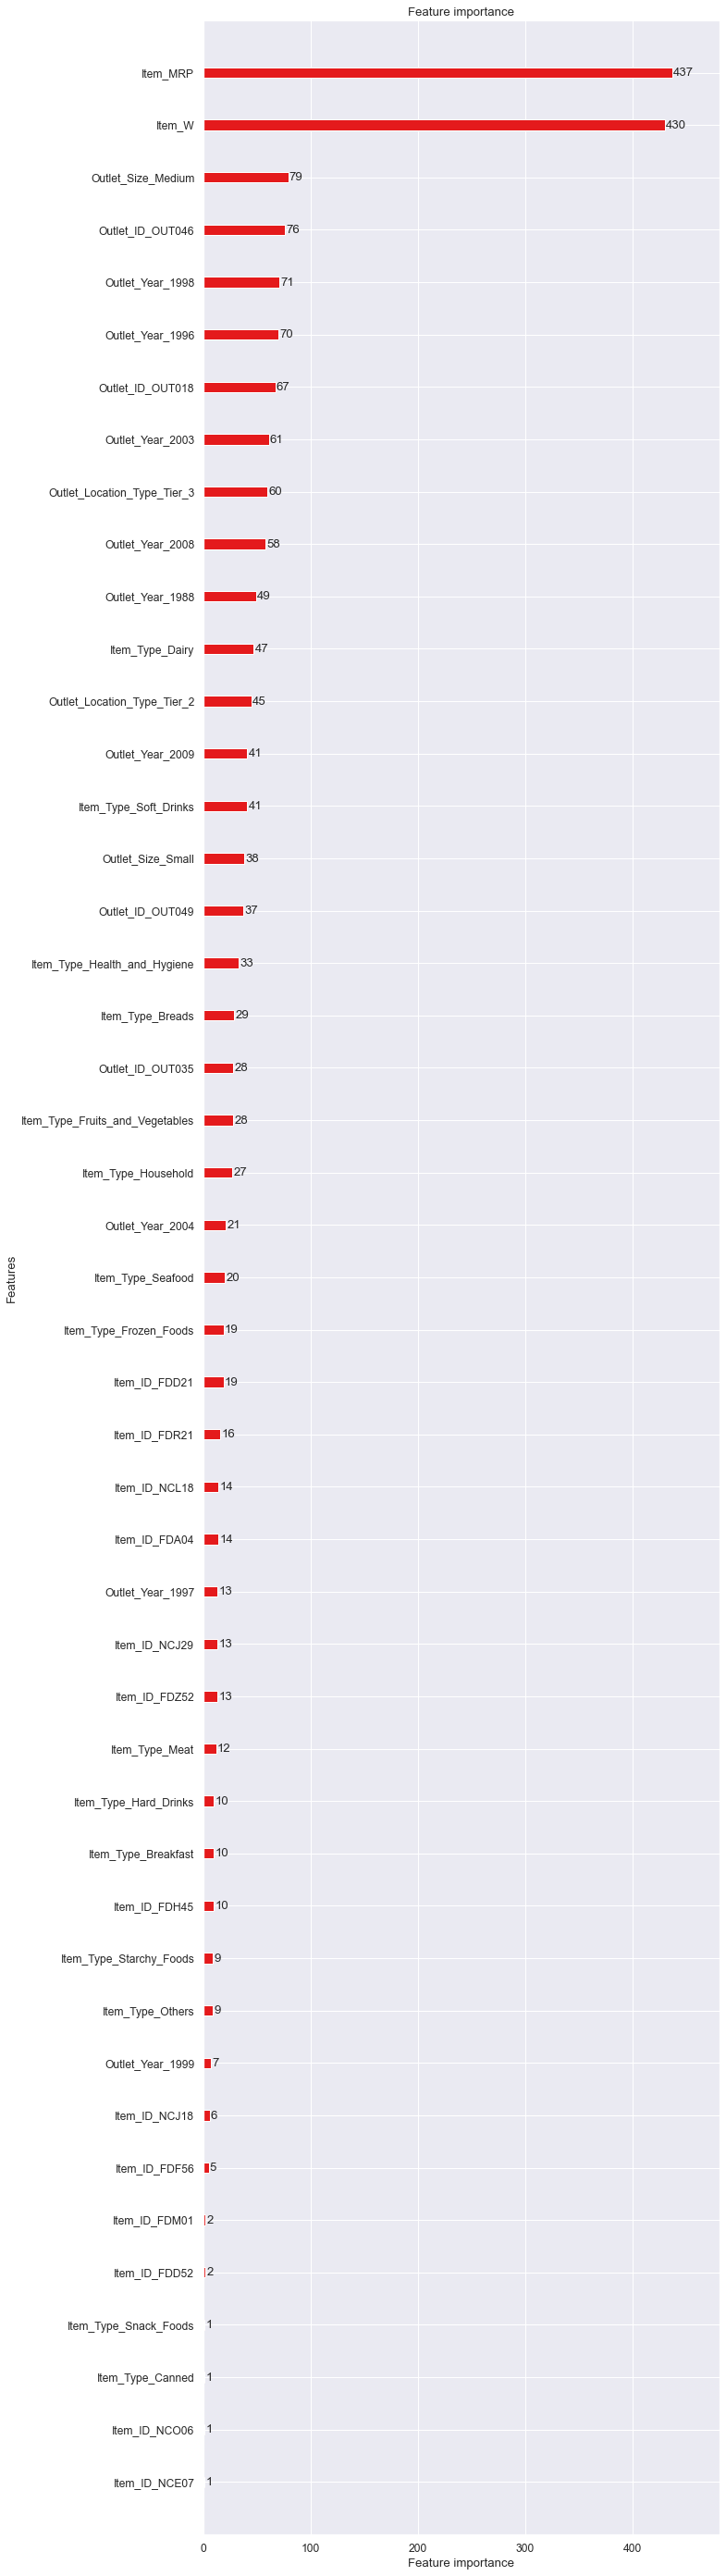

In [ ]:
#plot feature importance
from optuna.integration import lightgbm as lgb
lgb.plot_importance(model, max_num_features=0, figsize=(10,50))
plt.show()

In [ ]:
#catboost Regressor - optuna


'''from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
import lightgbm as lgbm
import xgboost as xgb
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import optuna
import tqdm
import warnings
import sklearn.exceptions
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

def objective(trial,data=X,target=y):
    
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.20,random_state=42)
    params = {'iterations':trial.suggest_int("iterations", 1000, 20000),
              'od_wait':trial.suggest_int('od_wait', 500, 2000),
              'loss_function':'RMSE',
              'task_type':"GPU",
              'eval_metric':'RMSE',
              'leaf_estimation_method':'Newton',
              'bootstrap_type': 'Bernoulli',
              'learning_rate' : trial.suggest_uniform('learning_rate',0.005,0.05),
              'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
              'subsample': trial.suggest_uniform('subsample',0,1),
              'random_strength': trial.suggest_uniform('random_strength',10,50),
              'depth': trial.suggest_int('depth',5,9),
              'min_data_in_leaf': trial.suggest_int('min_data_in_leaf',1,15),
              'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations',1,15),
              #'cat_features': cat_features,
               }
    model = CatBoostRegressor(**params)  
    model.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=100,verbose=False)
        
    y_preds = model.predict(X_test)
    loss = np.sqrt(mean_squared_error(y_test, y_preds))
    
    return loss

OPTUNA_OPTIMIZATION = True

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=200)
print('Number of finished trials:', len(study.trials))
print('Best trial: score {}, params {}'.format(study.best_trial.value, study.best_trial.params))'''

'from sklearn.preprocessing import LabelEncoder, StandardScaler\nfrom sklearn.preprocessing import OneHotEncoder\nimport category_encoders as ce\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import *\nfrom sklearn.model_selection import StratifiedKFold\nfrom sklearn import model_selection\nimport lightgbm as lgbm\nimport xgboost as xgb\nfrom lightgbm import LGBMRegressor\nfrom catboost import CatBoostRegressor\nimport optuna\nimport tqdm\nimport warnings\nimport sklearn.exceptions\nwarnings.filterwarnings(\'ignore\', category=DeprecationWarning)\nwarnings.filterwarnings(\'ignore\', category=FutureWarning)\nwarnings.filterwarnings(\'ignore\', category=RuntimeWarning)\nwarnings.filterwarnings(\'ignore\', category=UserWarning)\nwarnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)\n\ndef objective(trial,data=X,target=y):\n    \n    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.20,random_state=42)

In [ ]:
#cat_params = study.best_trial.params

cat_params = {'iterations': 12976, 'od_wait': 1053, 'learning_rate': 0.010054964037640973, 'reg_lambda': 73.4283303843113, 'subsample': 0.895645245696333, 'random_strength': 20.26667043513303, 'depth': 8, 'min_data_in_leaf': 9, 'leaf_estimation_iterations': 15}

cat_params['loss_function'] = 'RMSE'
cat_params['eval_metric'] = 'RMSE'
cat_params['bootstrap_type']= 'Bernoulli'
cat_params['leaf_estimation_method'] = 'Newton'
cat_params['random_state'] = 42
#cat_params['task_type']='GPU'
test_preds=None

In [ ]:
#catboost regressor

oofs = np.zeros(shape=(len(X)))
preds = np.zeros(test.shape[0])

kf = KFold(n_splits=10,random_state=48,shuffle=True)
rmse=[]  # list contains rmse for each fold
r2 =[]
n=0
for trn_idx, test_idx in kf.split(X,y):
    X_tr,X_val=X.iloc[trn_idx],X.iloc[test_idx]
    y_tr,y_val=y.iloc[trn_idx],y.iloc[test_idx]
    
    print("⁙" * 10)
    print(f"Fold {n + 1}")
    
    model =CatBoostRegressor(**cat_params)
    
    model.fit(X_tr,y_tr,eval_set=[(X_val,y_val)],early_stopping_rounds=100,verbose=1500)
    
    
    pred_y = model.predict(X_val)
    oofs[test_idx] = pred_y
   
    preds+=model.predict(test)/kf.n_splits
    
    rmse.append(mean_squared_error(y_val, model.predict(X_val), squared=False))
    r2.append(r2_score(y_val, model.predict(X_val)))
   
    
    print("rmse:",n+1, "=" ,rmse[n])
    print("r2:",n+1,"=" ,r2[n])
    
    n+=1
    
oof_score = mean_squared_error(y, oofs, squared=False)
print(f'\nOOF RMSE is : {oof_score}')

print(f'mean rmse: {np.mean(rmse)}')    
print(f'mean r2: {np.mean(r2)}') 

oofs=pd.DataFrame(oofs,columns=['cboof'])
preds=pd.DataFrame(preds,columns=['cbpred'])

oofs.to_csv('cboof.csv',index=False)
preds.to_csv('cbpred.csv',index=False)
    

⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 1
0:	learn: 1291.2851210	test: 1290.2556273	best: 1290.2556273 (0)	total: 37.6ms	remaining: 8m 7s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1271.944007
bestIteration = 1374

Shrink model to first 1375 iterations.
rmse: 1 = 1271.9440063917248
r2: 1 = 0.028277275460651063
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 2
0:	learn: 1291.3898546	test: 1289.9230378	best: 1289.9230378 (0)	total: 109ms	remaining: 23m 29s
1500:	learn: 1261.4882447	test: 1274.7736057	best: 1274.7736057 (1500)	total: 49.7s	remaining: 6m 19s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1274.773606
bestIteration = 1500

Shrink model to first 1501 iterations.
rmse: 2 = 1274.773606982689
r2: 2 = 0.023492546144258997
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 3
0:	learn: 1290.5936235	test: 1297.0926270	best: 1297.0926270 (0)	total: 29.3ms	remaining: 6m 20s
1500:	learn: 1261.1030156	test: 1278.4004443	best: 1278.3997900 (1498)	total: 49.8s	remaining: 6m 20s
Stopped by overfitting detector  (100 iterations wait)

b

In [ ]:
'''# XGB Regressor Optuna

import re
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import optuna
import xgboost as xgb

from sklearn.metrics import r2_score

def objective(trial,data=X,target=y):
    
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.2,random_state=42)
     
    param = {
        'tree_method':'gpu_hist',  # Use GPU acceleration
        'eval_metric': 'rmse', 
        'lambda': trial.suggest_loguniform(
            'lambda', 1e-3, 3.0
        ),
        'alpha': trial.suggest_loguniform(
            'alpha', 1e-3, 2.0
        ),
        'colsample_bytree': trial.suggest_categorical(
            'colsample_bytree', [0.5,0.6,0.7,0.8,0.9,1.0]
        ),
        'subsample': trial.suggest_categorical(
            'subsample', [0.6,0.7,0.8,1.0]
        ),
        'learning_rate': trial.suggest_categorical(
            'learning_rate', [0.008,0.005,0.02,0.05]
        ),
        'n_estimators': trial.suggest_categorical(
            "n_estimators", [4000, 5000, 6000, 7000, 8000, 9000, 10000]
        ),
        'max_depth': trial.suggest_categorical(
            'max_depth', [5,6,9,10]
        ),
        'random_state': 42,
        'min_child_weight': trial.suggest_int(
            'min_child_weight', 1, 300
        ),
    }
    model = xgb.XGBRegressor(**param)  
    
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=100,verbose=False)
    
    preds = model.predict(test_x)
    
    rmse = mean_squared_error(test_y, preds,squared=False)
    
    return rmse


study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)'''

'# XGB Regressor Optuna\n\nimport re\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import mean_squared_error\n\nimport optuna\nimport xgboost as xgb\n\nfrom sklearn.metrics import r2_score\n\ndef objective(trial,data=X,target=y):\n    \n    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.2,random_state=42)\n     \n    param = {\n        \'tree_method\':\'gpu_hist\',  # Use GPU acceleration\n        \'eval_metric\': \'rmse\', \n        \'lambda\': trial.suggest_loguniform(\n            \'lambda\', 1e-3, 3.0\n        ),\n        \'alpha\': trial.suggest_loguniform(\n            \'alpha\', 1e-3, 2.0\n        ),\n        \'colsample_bytree\': trial.suggest_categorical(\n            \'colsample_bytree\', [0.5,0.6,0.7,0.8,0.9,1.0]\n        ),\n        \'subsample\': trial.suggest_categorical(\n            \'subsample\', [0.6,0.7,0.8,1.0]\n        ),\n        \'learning_rate\': trial.

In [ ]:
#study.best_params

In [ ]:
#best_params = study.best_params

best_params = {'lambda': 0.009910262790652572, 'alpha': 0.7781326785462731, 'colsample_bytree': 1.0, 'subsample': 0.8, 'learning_rate': 0.02, 'n_estimators': 8000, 'max_depth': 5, 'min_child_weight': 254}

#best_params['tree_method'] = 'gpu_hist'
best_params['random_state'] = 42

In [ ]:
#xgbregressor + kfold

xgb_params = best_params
xgb_params['objective'] = 'reg:squarederror'
#xgb_params['tree_method'] = 'gpu_hist'
#xgb_params['predictor'] = 'gpu_predictor'
xgb_params['n_jobs'] = -1


#main
oofs = np.zeros(shape=(len(X)))

preds = np.zeros(test.shape[0])
kf = KFold(n_splits=10,random_state=48,shuffle=True)
rmse=[]  # list contains rmse for each fold
r2 =[]
n=0
for trn_idx, test_idx in kf.split(X,y):
    X_tr,X_val=X.iloc[trn_idx],X.iloc[test_idx]
    y_tr,y_val=y.iloc[trn_idx],y.iloc[test_idx]
    
    print("⁙" * 10)
    print(f"Fold {n + 1}")
    
    model = XGBRegressor(**xgb_params)
    
    model.fit(X_tr,y_tr,eval_set=[(X_val,y_val)],early_stopping_rounds=222,verbose=False)
    
    
    pred_y = model.predict(X_val)
    print(oofs.shape)
    print(pred_y.shape)
    oofs[test_idx] = pred_y
   
    preds+=model.predict(test)/kf.n_splits
    
    rmse.append(mean_squared_error(y_val, model.predict(X_val), squared=False))
    r2.append(r2_score(y_val, model.predict(X_val)))
   
    
    print("rmse:",n+1, "=" ,rmse[n])
    print("r2:",n+1,"=" ,r2[n])
    
    n+=1
    
oof_score = mean_squared_error(y, oofs, squared=False)
print(f'\nOOF RMSE is : {oof_score}')

print(f'mean rmse: {np.mean(rmse)}')    
print(f'mean r2: {np.mean(r2)}') 

oofs=pd.DataFrame(oofs,columns=['xgboof'])
preds=pd.DataFrame(preds,columns=['xgbpred'])

oofs.to_csv('xgboof.csv',index=False)
preds.to_csv('xgbpred.csv',index=False)
    

⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 1
(87851,)
(8786,)
rmse: 1 = 1271.9859610703727
r2: 1 = 0.028213170457910053
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 2
(87851,)
(8785,)
rmse: 2 = 1275.4625311689733
r2: 2 = 0.02243679572200108
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 3
(87851,)
(8785,)
rmse: 3 = 1279.2614076115467
r2: 3 = 0.027462877624378157
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 4
(87851,)
(8785,)
rmse: 4 = 1263.7367437866715
r2: 4 = 0.026704340189644737
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 5
(87851,)
(8785,)
rmse: 5 = 1262.527788198435
r2: 5 = 0.031415865942975185
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 6
(87851,)
(8785,)
rmse: 6 = 1286.3085047758227
r2: 6 = 0.027153754520506723
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 7
(87851,)
(8785,)
rmse: 7 = 1277.0213813569585
r2: 7 = 0.03036615417713706
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 8
(87851,)
(8785,)
rmse: 8 = 1274.742988821014
r2: 8 = 0.02843030166778926
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 9
(87851,)
(8785,)
rmse: 9 = 1278.3140684719085
r2: 9 = 0.0237792277592338
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 10
(87851,)
(8785,)
rmse: 10 = 1269.0276846068657
r2: 10 = 0.02274144856418736

OOF RMSE is : 1273.8575321118542
mean rmse: 1273.838905986857
mean r2: 0.0

In [ ]:
############ lasso starts #########

In [ ]:
#Lasso Regression HPT

'''from sklearn.metrics import make_scorer
#define your own mse and set greater_is_better=False
mse = make_scorer(mean_squared_error,greater_is_better=False)

l_min = 0.35
l_max = 0.45
l_num = 20
params2 = {'alpha': np.linspace(l_min,l_max, l_num)}

lasso = Lasso()

# cross validation
folds = 10
model_cv2 = GridSearchCV(estimator = lasso, 
                        param_grid = params2, 
                        scoring= mse, 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv2.fit(X, y)'''

"from sklearn.metrics import make_scorer\n#define your own mse and set greater_is_better=False\nmse = make_scorer(mean_squared_error,greater_is_better=False)\n\nl_min = 0.35\nl_max = 0.45\nl_num = 20\nparams2 = {'alpha': np.linspace(l_min,l_max, l_num)}\n\nlasso = Lasso()\n\n# cross validation\nfolds = 10\nmodel_cv2 = GridSearchCV(estimator = lasso, \n                        param_grid = params2, \n                        scoring= mse, \n                        cv = folds, \n                        return_train_score=True,\n                        verbose = 1)            \n\nmodel_cv2.fit(X, y)"

In [ ]:
'''cv_results2 = pd.DataFrame(model_cv2.cv_results_)
np.sqrt(cv_results2["mean_test_score"]*-1).min()'''

'cv_results2 = pd.DataFrame(model_cv2.cv_results_)\nnp.sqrt(cv_results2["mean_test_score"]*-1).min()'

In [ ]:
#cv_results2

In [ ]:
# plotting mean test and train scoes with alpha 
'''cv_results2['param_alpha'] = cv_results2['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results2['param_alpha'], cv_results2['mean_train_score'])
plt.plot(cv_results2['param_alpha'], cv_results2['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xscale('log') #taking xscle on log for better check of train and test score variations
plt.show()'''

'cv_results2[\'param_alpha\'] = cv_results2[\'param_alpha\'].astype(\'float32\')\n\n# plotting\nplt.plot(cv_results2[\'param_alpha\'], cv_results2[\'mean_train_score\'])\nplt.plot(cv_results2[\'param_alpha\'], cv_results2[\'mean_test_score\'])\nplt.xlabel(\'alpha\')\nplt.ylabel(\'Negative Mean Absolute Error\')\n\nplt.title("Negative Mean Absolute Error and alpha")\nplt.legend([\'train score\', \'test score\'], loc=\'upper left\')\nplt.xscale(\'log\') #taking xscle on log for better check of train and test score variations\nplt.show()'

In [ ]:
#lasso+K-fold

oofs = np.zeros(shape=(len(X)))
oof_vanilla = np.zeros(len(X))
preds = np.zeros(test.shape[0])

kf = KFold(n_splits=10,random_state=48,shuffle=True)

rmse=[]  
r2 =[]
n=0

for trn_idx, test_idx in kf.split(X,y):
    X_tr,X_val=X.iloc[trn_idx],X.iloc[test_idx]
    y_tr,y_val=y.iloc[trn_idx],y.iloc[test_idx]
    
    print("⁙" * 10)
    print(f"Fold {n + 1}")
    
    model = Lasso(alpha=0.4404040404040404)
    vanilla_model = Lasso()
    
    
    model.fit(X_tr,y_tr)
    vanilla_model.fit(X_tr,y_tr)

    pred_y = model.predict(X_val)
    p_vanilla = vanilla_model.predict(X_val)
    
    oofs[test_idx] = pred_y
    oof_vanilla[test_idx] = p_vanilla
   
    preds+=model.predict(test)/kf.n_splits
    
    rmse.append(mean_squared_error(y_val, model.predict(X_val), squared=False))
    r2.append(r2_score(y_val, model.predict(X_val)))
   
    
    print("rmse", "=" ,rmse[n])
    print("r2","=" ,r2[n])
    
    n+=1
    
print(f'mean square error on training data (vanilla model): {np.round(mean_squared_error(y, oof_vanilla, squared=False),5)}')    
print(f'mean square error on training data (with optuna tuning): {np.round(mean_squared_error(y, oofs, squared=False),5)}')

print(f'mean rmse: {np.mean(rmse)}')    
print(f'mean r2: {np.mean(r2)}') 

oofs=pd.DataFrame(oofs,columns=['lassoof'])
preds=pd.DataFrame(preds,columns=['lasspred'])

oofs.to_csv('lassoof.csv',index=False)
preds.to_csv('lasspred.csv',index=False)
    

⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 1
rmse = 1272.1810118671328
r2 = 0.02791511319289719
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 2
rmse = 1275.473057514611
r2 = 0.02242066006864929
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 3
rmse = 1279.0524841751903
r2 = 0.02778051279209226
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 4
rmse = 1265.317023508693
r2 = 0.024268641342720554
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 5
rmse = 1263.4457571189416
r2 = 0.030006861914327443
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 6
rmse = 1287.2246740549913
r2 = 0.025767447503037055
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 7
rmse = 1278.714369200502
r2 = 0.027793501152016842
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 8
rmse = 1277.058268362048
r2 = 0.02489782763020032
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 9
rmse = 1281.4029773925668
r2 = 0.01905566194589481
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 10
rmse = 1268.4386136220455
r2 = 0.023648506862217644
mean square error on training data (vanilla model): 1275.04723
mean square error on training data (with optuna tuning): 1274.85052
mean rmse: 1274.8308236816722
mean r2: 0.02535547344040534


In [ ]:
############ lasso ends #########

In [ ]:
### Ensemble Part-1 ###

In [ ]:
processing_DIR = 'C:\\Users\\pedne\\Python\\Competition\\machinehack\\'

In [ ]:
def process_data(DATA_DIR):
    
    train = pd.read_csv(DATA_DIR+"train.csv")
    test = pd.read_csv(DATA_DIR+"test.csv")
    sub= pd.read_csv(DATA_DIR+"submission.csv")
    
    #Removes train rows which has Region_Code not present in test set
    test_Item_ID_list=test['Item_ID'].tolist()
    train=train[train['Item_ID'].isin(test_Item_ID_list)]
     
    target=train[['Sales']]    
        
    lgbmpred = pd.read_csv(DATA_DIR+'lgbmpred.csv')
    xgbpred = pd.read_csv(DATA_DIR+'xgbpred.csv')
    catboostpred = pd.read_csv(DATA_DIR+'cbpred.csv')
    lasspred = pd.read_csv(DATA_DIR+'lasspred.csv')
   
    total_pred = pd.concat([lgbmpred,xgbpred,catboostpred,lasspred], axis=1)
        
    lgbmoof = pd.read_csv(DATA_DIR+'lgbmoof.csv')
    xgboof = pd.read_csv(DATA_DIR+'xgboof.csv')
    catboostoof = pd.read_csv(DATA_DIR+'cboof.csv')
    lassoof = pd.read_csv(DATA_DIR+'lassoof.csv')
        
    total_oof = pd.concat([lgbmoof,xgboof,catboostoof,lassoof], axis=1)
        
    print("len(total_oof) = ", len(total_oof))
    return train,target,sub,test,total_pred,total_oof

In [ ]:
def findbestweight(df1,df2,target):
    min_rmse = 1500
    max_weight = 0
    min_ensemble_oof  = 0
    weights_list = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
    #print("target",target)
    for weight in weights_list:
        ensemble_oof = weight*df1 + (1-weight)*df2
        rmse_score = mean_squared_error(target,ensemble_oof, squared=False)
        if rmse_score < min_rmse:
            min_ensemble_oof = ensemble_oof
            min_rmse = rmse_score
            max_weight = weight
    print("The best weights for blending is {0} with rmse {1}".format(max_weight, min_rmse))
    return max_weight

In [ ]:
def blend():
    train,target,sub,test,total_pred,total_oof=process_data(processing_DIR)
    
    weight1=findbestweight(total_oof['lgbmoof'],total_oof['xgboof'],target)
    lgbm_xgb=weight1*total_oof['lgbmoof'] + (1-weight1)*total_oof['xgboof']
    
    weight2=findbestweight(lgbm_xgb,total_oof['cboof'],target)
    lgb_xgb_cb=weight2*lgbm_xgb +(1-weight2)*total_oof['cboof']
    
    lgb_xgb_cb_pred=(weight1*total_pred['lgbmpred']+(1-weight1)*total_pred['xgbpred'])*weight2+total_pred['cbpred']*(1-weight2)
    
    sub['Sales']=lgb_xgb_cb_pred
    sub.to_csv('blend_lgbm_xgb_cb.csv',index=False)
    print(sub)

In [ ]:
blend()

len(total_oof) =  87851
The best weights for blending is 0.65 with rmse 1273.588119486324
The best weights for blending is 0.5 with rmse 1273.3491660525412
             Sales
0      2015.901710
1      1895.146112
2      1868.286681
3      1740.715055
4      1494.124257
5      1987.605443
6      1973.762859
7      2226.232067
8      1754.984135
9      1947.366104
10     1915.295614
11     1658.846638
12     2032.288715
13     1753.758266
14     1893.268808
15     1712.387913
16     1468.389838
17     1544.738185
18     1844.130535
19     1899.156474
20     1874.268050
21     1547.173447
22     1857.115636
23     1914.555083
24     2044.345998
25     2358.626552
26     1842.625021
27     1812.194162
28     1904.382732
29     1452.656511
30     2012.841467
31     1691.467696
32     2062.760391
33     1797.934061
34     2223.682606
35     2309.326103
36     1552.968052
37     1768.132009
38     1920.867106
39     2044.891883
40     1422.858969
41     1871.024064
42     1505.088997
43     1

In [ ]:
sub= pd.read_csv("submission.csv")

one = pd.read_csv('blend_lgbm_xgb_cb.csv')
two = pd.read_csv('lasspred.csv')

part1_pred = one["Sales"]*0.65 + two["lasspred"]*0.35 

sub['Sales']=part1_pred
sub.to_csv('part1_pred.csv',index=False)
sub['Sales'].head()

0    2021.537722
1    1855.225036
2    1824.916066
3    1722.383690
4    1518.010496
Name: Sales, dtype: float64

In [ ]:
### Part 1 Ends ###

In [ ]:
### Part 2 Starts ###

In [ ]:
train_data = pd.read_csv('C:\\Users\\pedne\\Python\\Competition\\machinehack\\train.csv')
test_data  = pd.read_csv('C:\\Users\\pedne\\Python\\Competition\\machinehack\\test.csv')

#Shape of train and test
print('There are {} rows and {} columns in train'.format(train_data.shape[0],train_data.shape[1]))
print('There are {} rows and {} columns in train'.format(test_data.shape[0],test_data.shape[1]))

There are 87864 rows and 9 columns in train
There are 37656 rows and 8 columns in train


In [ ]:
#Prepare submission File
submission = pd.DataFrame()

In [ ]:
train_data.replace(r"^ +| +$", r"", regex=True, inplace=True)
test_data.replace(r"^ +| +$", r"", regex=True, inplace=True)

train_data['Outlet_Year']  = train_data['Outlet_Year'].astype('object')
test_data['Outlet_Year']   = test_data['Outlet_Year'].astype('object')

#Removes train rows which has Region_Code not present in test set
test_Item_ID_list=test_data['Item_ID'].tolist()
train_data=train_data[train_data['Item_ID'].isin(test_Item_ID_list)]

test_data['Item_ID'].replace(to_replace ="FDW34",value ="FDW35", inplace=True) 

In [ ]:
#outlier 1  : - Remove all negative sales
train_data = train_data[(train_data['Sales'] >= 0)]

#outlier 2 : Remove record with Sales > 10000
train_data = train_data[(train_data['Sales'] < 10000)]
len(train_data)

87453

In [ ]:
train_data['train_or_test']='train'
test_data['train_or_test']='test'

df=pd.concat([train_data,test_data])

print("Combined dataset shape: {0}: ".format(df.shape))

Combined dataset shape: (125109, 10): 


In [ ]:
def preparedatafortraining(df):
    
    train=df.loc[df.train_or_test.isin(['train'])]
    test=df.loc[df.train_or_test.isin(['test'])]
    
    target=['Sales']
    y=train[target]
    
    drop_columns_train={'Sales','train_or_test'}
    drop_columns_test={'Sales','train_or_test'}
    
    train_corr = train.copy()
    
    train=train.drop(columns=drop_columns_train,axis=1)
    test=test.drop(columns=drop_columns_test,axis=1)
    
    train_df = pd.get_dummies(train, drop_first = True)
    test_df = pd.get_dummies(test, drop_first = True)
    
    train_corr_df = pd.get_dummies(train_corr, drop_first = True)
    
    print("Train dataset shape: {0}, \nTest dataset shape: {1}".format(train_df.shape, test_df.shape))
  
    return train_df,y,test_df,train_corr_df

In [ ]:
X,y,test,train_corr=preparedatafortraining(df)
print(X.shape)
print(y.shape)
print(test.shape)

Train dataset shape: (87453, 926), 
Test dataset shape: (37656, 926)
(87453, 926)
(87453, 1)
(37656, 926)


In [ ]:
corr_matrix=train_corr.corr()

# Finding variables having coefficients greater than 0.002 (here 0.002 is a hypothetical number) and also for lesser than 0.002 
df_corr_top = corr_matrix.loc[(corr_matrix['Sales']>=0.002) | (corr_matrix['Sales']<=-0.002), :]

In [ ]:
top_features = list(df_corr_top.index)
top_features

['Item_MRP',
 'Sales',
 'Item_ID_DRB24',
 'Item_ID_DRB25',
 'Item_ID_DRC25',
 'Item_ID_DRC27',
 'Item_ID_DRD01',
 'Item_ID_DRD27',
 'Item_ID_DRD37',
 'Item_ID_DRE37',
 'Item_ID_DRE48',
 'Item_ID_DRF01',
 'Item_ID_DRF03',
 'Item_ID_DRF13',
 'Item_ID_DRF15',
 'Item_ID_DRF23',
 'Item_ID_DRF49',
 'Item_ID_DRF51',
 'Item_ID_DRG01',
 'Item_ID_DRG03',
 'Item_ID_DRG23',
 'Item_ID_DRG25',
 'Item_ID_DRG37',
 'Item_ID_DRH03',
 'Item_ID_DRH37',
 'Item_ID_DRH39',
 'Item_ID_DRH51',
 'Item_ID_DRI11',
 'Item_ID_DRI23',
 'Item_ID_DRI47',
 'Item_ID_DRI49',
 'Item_ID_DRJ13',
 'Item_ID_DRJ24',
 'Item_ID_DRK11',
 'Item_ID_DRK12',
 'Item_ID_DRK47',
 'Item_ID_DRK49',
 'Item_ID_DRL01',
 'Item_ID_DRL11',
 'Item_ID_DRL23',
 'Item_ID_DRL37',
 'Item_ID_DRL47',
 'Item_ID_DRL49',
 'Item_ID_DRL60',
 'Item_ID_DRM37',
 'Item_ID_DRM47',
 'Item_ID_DRN47',
 'Item_ID_DRO35',
 'Item_ID_DRO47',
 'Item_ID_DRP47',
 'Item_ID_DRQ35',
 'Item_ID_FDA02',
 'Item_ID_FDA03',
 'Item_ID_FDA04',
 'Item_ID_FDA08',
 'Item_ID_FDA21',
 'Ite

In [ ]:
top_features.remove('Sales')

X = X[top_features]
test = test[top_features]
X.shape,test.shape

((87453, 551), (37656, 551))

In [ ]:
#Prediction - 1 (Default - No Tuning)
from catboost import CatBoostRegressor
from keras.metrics import mean_squared_logarithmic_error
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import PolynomialFeatures

X_train, X_val, Y_train, Y_val = train_test_split(X,y, test_size=0.2, random_state=42)

print (X_train.shape)
print (Y_train.shape)
print ('\n')
print (X_val.shape)
print (Y_val.shape)

# Lets stick to default Hyperparametrs as of now. We shall tune the best model
lin_reg = LinearRegression()
lasso_reg = Lasso()
xgb = XGBRegressor(random_state= 42)
lgb = LGBMRegressor(random_state= 42)
cb  = CatBoostRegressor(random_state= 42)

def training_predict(trainer, X_train, Y_train, X_test, Y_test):
    scores = {} # Initializing a Dictionary to store evaluation metrics
    
    trainer.fit(X_train, Y_train)  # Training
    Y_pred = trainer.predict(X_test) # Predicts
     
    scores['R2']   = r2_score(Y_test, Y_pred)
    scores['RMSE'] = (np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
    
    return scores

# Ignore the error
predictors = {} # Initializing a dictionary to store training and testing data
for model in [ lin_reg,  lasso_reg,  xgb, lgb, cb  ]: # these are our objects that we instantiated above. We loop through them
    model_name = model.__class__.__name__
    predictors[model_name]  = {}
    predictors[model_name] =  training_predict(model, X_train, Y_train, X_val, Y_val)    

(69962, 551)
(69962, 1)


(17491, 551)
(17491, 1)
Learning rate set to 0.083135
0:	learn: 1284.6362533	total: 7.26ms	remaining: 7.25s
1:	learn: 1283.1178909	total: 14.9ms	remaining: 7.42s
2:	learn: 1281.6281918	total: 22.5ms	remaining: 7.48s
3:	learn: 1280.2447142	total: 29.8ms	remaining: 7.42s
4:	learn: 1279.2881139	total: 37.3ms	remaining: 7.43s
5:	learn: 1278.2710228	total: 44.8ms	remaining: 7.43s
6:	learn: 1277.8463223	total: 49ms	remaining: 6.96s
7:	learn: 1277.0437210	total: 56.4ms	remaining: 6.99s
8:	learn: 1276.4169954	total: 63.7ms	remaining: 7.01s
9:	learn: 1275.7933021	total: 71ms	remaining: 7.03s
10:	learn: 1275.2811236	total: 78ms	remaining: 7.01s
11:	learn: 1274.8277694	total: 85.5ms	remaining: 7.04s
12:	learn: 1274.3439215	total: 92.5ms	remaining: 7.03s
13:	learn: 1273.8966880	total: 99.4ms	remaining: 7s
14:	learn: 1273.5259493	total: 106ms	remaining: 6.98s
15:	learn: 1273.2364902	total: 113ms	remaining: 6.98s
16:	learn: 1272.9760820	total: 121ms	remaining: 7.01s
17:	lea

156:	learn: 1262.0541186	total: 1.07s	remaining: 5.75s
157:	learn: 1262.0186148	total: 1.08s	remaining: 5.75s
158:	learn: 1261.9757067	total: 1.08s	remaining: 5.74s
159:	learn: 1261.9312695	total: 1.09s	remaining: 5.74s
160:	learn: 1261.8859040	total: 1.1s	remaining: 5.73s
161:	learn: 1261.8264317	total: 1.11s	remaining: 5.72s
162:	learn: 1261.7680390	total: 1.11s	remaining: 5.71s
163:	learn: 1261.7113554	total: 1.12s	remaining: 5.71s
164:	learn: 1261.6525157	total: 1.13s	remaining: 5.7s
165:	learn: 1261.6021404	total: 1.13s	remaining: 5.69s
166:	learn: 1261.5514193	total: 1.14s	remaining: 5.68s
167:	learn: 1261.4838840	total: 1.15s	remaining: 5.67s
168:	learn: 1261.4404862	total: 1.15s	remaining: 5.66s
169:	learn: 1261.3812045	total: 1.16s	remaining: 5.66s
170:	learn: 1261.3175658	total: 1.17s	remaining: 5.65s
171:	learn: 1261.2562446	total: 1.17s	remaining: 5.65s
172:	learn: 1261.2014380	total: 1.18s	remaining: 5.64s
173:	learn: 1261.1548783	total: 1.19s	remaining: 5.63s
174:	learn: 

317:	learn: 1254.0626124	total: 2.17s	remaining: 4.66s
318:	learn: 1254.0182787	total: 2.18s	remaining: 4.65s
319:	learn: 1253.9406218	total: 2.19s	remaining: 4.65s
320:	learn: 1253.8968135	total: 2.19s	remaining: 4.64s
321:	learn: 1253.8722457	total: 2.2s	remaining: 4.64s
322:	learn: 1253.8110645	total: 2.21s	remaining: 4.63s
323:	learn: 1253.7604568	total: 2.21s	remaining: 4.62s
324:	learn: 1253.7256973	total: 2.22s	remaining: 4.62s
325:	learn: 1253.6709417	total: 2.23s	remaining: 4.61s
326:	learn: 1253.6268461	total: 2.23s	remaining: 4.6s
327:	learn: 1253.5796454	total: 2.24s	remaining: 4.59s
328:	learn: 1253.5149305	total: 2.25s	remaining: 4.58s
329:	learn: 1253.4831960	total: 2.25s	remaining: 4.58s
330:	learn: 1253.4425755	total: 2.26s	remaining: 4.57s
331:	learn: 1253.3874615	total: 2.32s	remaining: 4.68s
332:	learn: 1253.3287024	total: 2.34s	remaining: 4.69s
333:	learn: 1253.3014996	total: 2.37s	remaining: 4.72s
334:	learn: 1253.2648495	total: 2.38s	remaining: 4.73s
335:	learn: 

471:	learn: 1247.4831182	total: 4.17s	remaining: 4.66s
472:	learn: 1247.4650257	total: 4.17s	remaining: 4.65s
473:	learn: 1247.4510177	total: 4.18s	remaining: 4.64s
474:	learn: 1247.4238125	total: 4.19s	remaining: 4.63s
475:	learn: 1247.3750884	total: 4.19s	remaining: 4.62s
476:	learn: 1247.3438142	total: 4.2s	remaining: 4.61s
477:	learn: 1247.3001649	total: 4.21s	remaining: 4.59s
478:	learn: 1247.2715356	total: 4.21s	remaining: 4.58s
479:	learn: 1247.2319428	total: 4.22s	remaining: 4.57s
480:	learn: 1247.1910517	total: 4.23s	remaining: 4.56s
481:	learn: 1247.1409837	total: 4.23s	remaining: 4.55s
482:	learn: 1247.1212677	total: 4.24s	remaining: 4.54s
483:	learn: 1247.0768589	total: 4.25s	remaining: 4.53s
484:	learn: 1247.0327170	total: 4.25s	remaining: 4.52s
485:	learn: 1246.9962253	total: 4.26s	remaining: 4.51s
486:	learn: 1246.9351952	total: 4.27s	remaining: 4.5s
487:	learn: 1246.8760547	total: 4.28s	remaining: 4.49s
488:	learn: 1246.8294074	total: 4.28s	remaining: 4.47s
489:	learn: 

635:	learn: 1241.2927784	total: 5.26s	remaining: 3.01s
636:	learn: 1241.2608966	total: 5.27s	remaining: 3s
637:	learn: 1241.2036521	total: 5.28s	remaining: 2.99s
638:	learn: 1241.1545002	total: 5.28s	remaining: 2.98s
639:	learn: 1241.1303058	total: 5.29s	remaining: 2.98s
640:	learn: 1241.1072677	total: 5.3s	remaining: 2.97s
641:	learn: 1241.0626879	total: 5.3s	remaining: 2.96s
642:	learn: 1241.0316614	total: 5.31s	remaining: 2.95s
643:	learn: 1240.9880463	total: 5.32s	remaining: 2.94s
644:	learn: 1240.9684854	total: 5.33s	remaining: 2.93s
645:	learn: 1240.9319939	total: 5.33s	remaining: 2.92s
646:	learn: 1240.9068490	total: 5.34s	remaining: 2.91s
647:	learn: 1240.8746752	total: 5.35s	remaining: 2.91s
648:	learn: 1240.8301705	total: 5.36s	remaining: 2.9s
649:	learn: 1240.7910513	total: 5.36s	remaining: 2.89s
650:	learn: 1240.7471168	total: 5.37s	remaining: 2.88s
651:	learn: 1240.7394537	total: 5.38s	remaining: 2.87s
652:	learn: 1240.7162677	total: 5.38s	remaining: 2.86s
653:	learn: 1240

799:	learn: 1235.5098587	total: 6.36s	remaining: 1.59s
800:	learn: 1235.4969931	total: 6.37s	remaining: 1.58s
801:	learn: 1235.4671112	total: 6.38s	remaining: 1.57s
802:	learn: 1235.4247410	total: 6.38s	remaining: 1.57s
803:	learn: 1235.4031021	total: 6.39s	remaining: 1.56s
804:	learn: 1235.3593189	total: 6.4s	remaining: 1.55s
805:	learn: 1235.3378991	total: 6.4s	remaining: 1.54s
806:	learn: 1235.2946310	total: 6.41s	remaining: 1.53s
807:	learn: 1235.2579048	total: 6.42s	remaining: 1.52s
808:	learn: 1235.2123080	total: 6.42s	remaining: 1.52s
809:	learn: 1235.1729566	total: 6.43s	remaining: 1.51s
810:	learn: 1235.1348541	total: 6.44s	remaining: 1.5s
811:	learn: 1235.1136336	total: 6.44s	remaining: 1.49s
812:	learn: 1235.0733180	total: 6.45s	remaining: 1.48s
813:	learn: 1235.0367896	total: 6.46s	remaining: 1.48s
814:	learn: 1235.0026616	total: 6.46s	remaining: 1.47s
815:	learn: 1234.9855474	total: 6.47s	remaining: 1.46s
816:	learn: 1234.9629262	total: 6.48s	remaining: 1.45s
817:	learn: 1

967:	learn: 1229.8598896	total: 7.46s	remaining: 247ms
968:	learn: 1229.8022431	total: 7.47s	remaining: 239ms
969:	learn: 1229.7749098	total: 7.47s	remaining: 231ms
970:	learn: 1229.7452177	total: 7.48s	remaining: 223ms
971:	learn: 1229.7183836	total: 7.49s	remaining: 216ms
972:	learn: 1229.6684563	total: 7.49s	remaining: 208ms
973:	learn: 1229.6296811	total: 7.5s	remaining: 200ms
974:	learn: 1229.5995535	total: 7.51s	remaining: 192ms
975:	learn: 1229.5565335	total: 7.51s	remaining: 185ms
976:	learn: 1229.4998241	total: 7.52s	remaining: 177ms
977:	learn: 1229.4816231	total: 7.53s	remaining: 169ms
978:	learn: 1229.4381383	total: 7.53s	remaining: 162ms
979:	learn: 1229.4116554	total: 7.54s	remaining: 154ms
980:	learn: 1229.3699619	total: 7.54s	remaining: 146ms
981:	learn: 1229.3270853	total: 7.55s	remaining: 138ms
982:	learn: 1229.2822242	total: 7.56s	remaining: 131ms
983:	learn: 1229.2512341	total: 7.56s	remaining: 123ms
984:	learn: 1229.2232657	total: 7.57s	remaining: 115ms
985:	learn:

In [ ]:
pd.DataFrame(predictors).T.sort_values('RMSE', ascending=True) # >=0 , <10000 , > 0.0005

R2         RMSE
Lasso              0.024478  1271.830366
LGBMRegressor      0.023875  1272.223462
LinearRegression   0.022732  1272.968131
CatBoostRegressor  0.020709  1274.285350
XGBRegressor       0.011203  1280.454713

In [ ]:
### LGBM Optuna Tuning ###

'''from optuna.integration import LightGBMPruningCallback

def objective(trial, X, y):
    
    params = {
        'objective': 'regression',
        'random_state': 48,
        'n_estimators': 10000,
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 3.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 3.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.005,0.008,0.01,0.014,0.017,0.02,0.03,0.05]),
        'max_depth': trial.suggest_categorical('max_depth', [5,6,7,8,9,10]),
        'num_leaves' : trial.suggest_int('num_leaves', 2, 400),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 300),
        'cat_smooth' : trial.suggest_int('min_data_per_groups', 1, 100)
    }
    model = LGBMRegressor(**params) 
    
    split = KFold(n_splits=10)
    train_scores = []
    test_scores = []
    for train_idx, val_idx in split.split(X):
        X_tr = X.iloc[train_idx]
        X_val = X.iloc[val_idx]
        y_tr = y.iloc[train_idx]
        y_val = y.iloc[val_idx]
        
        model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)],
                  eval_metric=['rmse'],
                  early_stopping_rounds=30, verbose=False,
                  # optuna allows us to pass pruning callback to xgboost callbacks, so any trial which does not seem to be 
                  # better or not qualify a given threshold of loss reduciton after some iterations will get pruned, that is
                  # stopped in between hence saving time, we will see it in action below.
                  #callbacks=[optuna.integration.LightGBMPruningCallback(trial, 'rmse', valid_name='valid_0')]
                 )
    
        train_score = np.round(np.sqrt(mean_squared_error(y_tr, model.predict(X_tr))), 4)
        test_score = np.round(np.sqrt(mean_squared_error(y_val, model.predict(X_val))), 4)
        train_scores.append(train_score)
        test_scores.append(test_score)
        
    
    #print(f'train score : {train_scores}')
    #print(f'test score : {test_scores}')
    train_score = np.round(np.mean(train_scores), 4)
    test_score = np.round(np.mean(test_scores), 4)
    
    #print(f'TRAIN RMSE : {train_score} || TEST RMSE : {test_score}')
    
    # you can make this function as bespoke as possible... you can return any kind of modified value using the return function
    # optuna will try to optimize it!!
    
    return test_score

from functools import partial
optimize = partial(objective, X=X, y=y)

study = optuna.create_study(direction='minimize')
study.optimize(optimize, n_trials=20)'''

"from optuna.integration import LightGBMPruningCallback\n\ndef objective(trial, X, y):\n    \n    params = {\n        'objective': 'regression',\n        'random_state': 48,\n        'n_estimators': 10000,\n        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 3.0),\n        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 3.0),\n        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),\n        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),\n        'learning_rate': trial.suggest_categorical('learning_rate', [0.005,0.008,0.01,0.014,0.017,0.02,0.03,0.05]),\n        'max_depth': trial.suggest_categorical('max_depth', [5,6,7,8,9,10]),\n        'num_leaves' : trial.suggest_int('num_leaves', 2, 400),\n        'min_child_samples': trial.suggest_int('min_child_samples', 1, 300),\n        'cat_smooth' : trial.suggest_int('min_data_per_groups', 1, 100)\n    }\n    model = LGBMRegressor(**

In [ ]:
#study.best_params

In [ ]:
#params=study.best_params

params= {'reg_alpha': 2.6965852468785543,
         'reg_lambda': 0.01732791090732265,
         'colsample_bytree': 0.4,
         'subsample': 0.8,
         'learning_rate': 0.05,
         'max_depth': 5,
         'num_leaves': 236,
         'min_child_samples': 179,
         'min_data_per_groups': 3}

params['random_state'] = 48
params['n_estimators'] = 20000 
params['metric'] = 'rmse'
params['cat_smooth'] = params.pop('min_data_per_groups')

params

{'reg_alpha': 2.6965852468785543,
 'reg_lambda': 0.01732791090732265,
 'colsample_bytree': 0.4,
 'subsample': 0.8,
 'learning_rate': 0.05,
 'max_depth': 5,
 'num_leaves': 236,
 'min_child_samples': 179,
 'random_state': 48,
 'n_estimators': 20000,
 'metric': 'rmse',
 'cat_smooth': 3}

In [ ]:
#lgbm+kfold

oofs = np.zeros(shape=(len(X)))
oof_vanilla = np.zeros(len(X))
preds = np.zeros(test.shape[0])

kf = KFold(n_splits=10,random_state=48,shuffle=True)

rmse=[]  
r2 =[]
n=0

for trn_idx, test_idx in kf.split(X,y):
    X_tr,X_val=X.iloc[trn_idx],X.iloc[test_idx]
    y_tr,y_val=y.iloc[trn_idx],y.iloc[test_idx]
    
    print("⁙" * 10)
    print(f"Fold {n + 1}")
    
    model = LGBMRegressor(**params)
    vanilla_model = LGBMRegressor()
    
    
    model.fit(X_tr,y_tr,eval_set=[(X_val,y_val)],early_stopping_rounds=100,verbose=False)
    vanilla_model.fit(X_tr,y_tr)

    pred_y = model.predict(X_val)
    p_vanilla = vanilla_model.predict(X_val)
    
    oofs[test_idx] = pred_y
    oof_vanilla[test_idx] = p_vanilla
   
    preds+=model.predict(test)/kf.n_splits
    
    rmse.append(mean_squared_error(y_val, model.predict(X_val), squared=False))
    r2.append(r2_score(y_val, model.predict(X_val)))
   
    
    print("rmse", "=" ,rmse[n])
    print("r2","=" ,r2[n])
    
    n+=1
    
print(f'mean square error on training data (vanilla model): {np.round(mean_squared_error(y, oof_vanilla, squared=False),5)}')    
print(f'mean square error on training data (with optuna tuning): {np.round(mean_squared_error(y, oofs, squared=False),5)}')

print(f'mean rmse: {np.mean(rmse)}')    
print(f'mean r2: {np.mean(r2)}') 

oofs=pd.DataFrame(oofs,columns=['lgbmoof'])
preds=pd.DataFrame(preds,columns=['lgbmpred'])

oofs.to_csv('lgbmoof.csv',index=False)
preds.to_csv('lgbmpred.csv',index=False)
    

⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 1
rmse = 1263.5868563235956
r2 = 0.02333849782334485
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 2
rmse = 1274.6068983495245
r2 = 0.02889092708567531
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 3
rmse = 1270.3300139975524
r2 = 0.02736516213400675
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 4
rmse = 1278.6785183926308
r2 = 0.021074378703969776
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 5
rmse = 1256.917275367666
r2 = 0.028038622735856444
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 6
rmse = 1279.4627389626053
r2 = 0.031075462364930972
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 7
rmse = 1263.4831048978267
r2 = 0.0196276248264452
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 8
rmse = 1276.4647026256007
r2 = 0.02689944537985911
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 9
rmse = 1255.5430208510033
r2 = 0.02554746336409741
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 10
rmse = 1278.5290765765692
r2 = 0.03041903320603845
mean square error on training data (vanilla model): 1271.39133
mean square error on training data (with optuna tuning): 1269.79029
mean rmse: 1269.7602206344577
mean r2: 0.026227661762422427


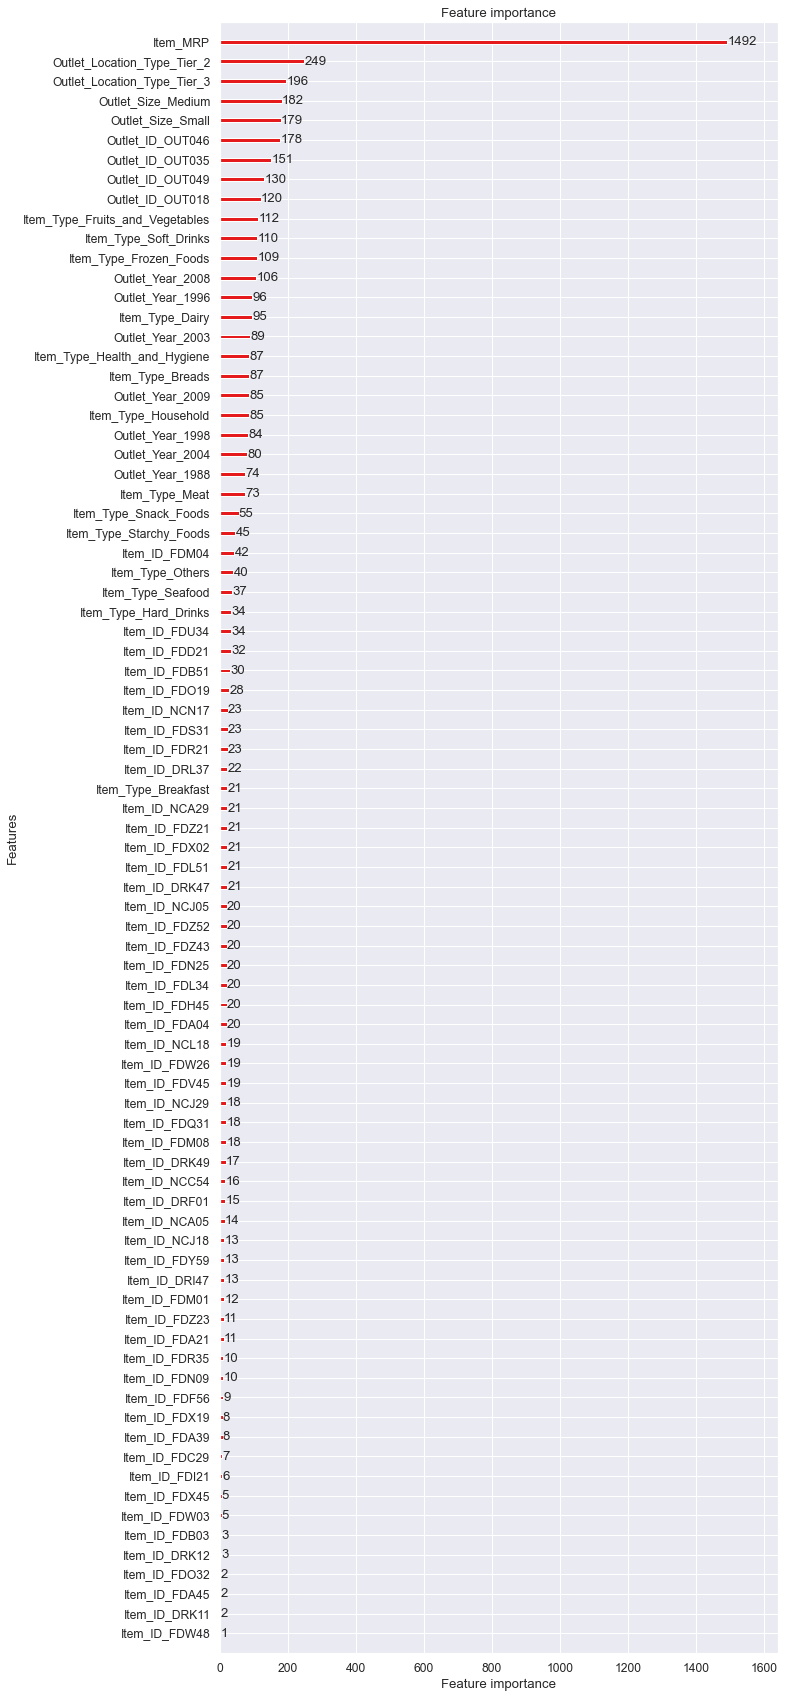

In [ ]:
from optuna.integration import lightgbm as lgb
lgb.plot_importance(model, max_num_features=0, figsize=(10,30))
plt.show()

In [ ]:
### Catboost Optuna Tuning ###

'''def objective(trial, X, y):
    
    params = {'iterations':trial.suggest_int("iterations", 1000, 20000),
              'od_wait':trial.suggest_int('od_wait', 500, 2000),
              'loss_function':'RMSE',
              'task_type':"GPU",
              'eval_metric':'RMSE',
              'leaf_estimation_method':'Newton',
              'bootstrap_type': 'Bernoulli',
              'learning_rate' : trial.suggest_uniform('learning_rate',0.005,0.05),
              'reg_lambda': trial.suggest_uniform('reg_lambda',1e-3,100),
              'subsample': trial.suggest_uniform('subsample',0,1),
              'random_strength': trial.suggest_uniform('random_strength',10,50),
              'depth': trial.suggest_int('depth',4,10),
              'min_data_in_leaf': trial.suggest_int('min_data_in_leaf',1,15),
              'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations',1,15),
              #'l2_leaf_reg' : trial.suggest_uniform('l2_leaf_reg',1,3),
              #'cat_features': cat_features,
               }
    model = CatBoostRegressor(**params)  
    
    split = KFold(n_splits=10)
    train_scores = []
    test_scores = []
    for train_idx, val_idx in split.split(X):
        X_tr = X.iloc[train_idx]
        X_val = X.iloc[val_idx]
        y_tr = y.iloc[train_idx]
        y_val = y.iloc[val_idx]
        
        model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)],
                  early_stopping_rounds=30, verbose=1000,
                  
                 )
    
        train_score = np.round(np.sqrt(mean_squared_error(y_tr, model.predict(X_tr))), 4)
        test_score = np.round(np.sqrt(mean_squared_error(y_val, model.predict(X_val))), 4)
        train_scores.append(train_score)
        test_scores.append(test_score)
        
    
    #print(f'train score : {train_scores}')
    #print(f'test score : {test_scores}')
    train_score = np.round(np.mean(train_scores), 4)
    test_score = np.round(np.mean(test_scores), 4)
    
    #print(f'TRAIN RMSE : {train_score} || TEST RMSE : {test_score}')
    
    # you can make this function as bespoke as possible... you can return any kind of modified value using the return function
    # optuna will try to optimize it!!
    
    return test_score

from functools import partial
optimize = partial(objective, X=X, y=y)

study = optuna.create_study(direction='minimize')
study.optimize(optimize, n_trials=10)'''

'def objective(trial, X, y):\n    \n    params = {\'iterations\':trial.suggest_int("iterations", 1000, 20000),\n              \'od_wait\':trial.suggest_int(\'od_wait\', 500, 2000),\n              \'loss_function\':\'RMSE\',\n              \'task_type\':"GPU",\n              \'eval_metric\':\'RMSE\',\n              \'leaf_estimation_method\':\'Newton\',\n              \'bootstrap_type\': \'Bernoulli\',\n              \'learning_rate\' : trial.suggest_uniform(\'learning_rate\',0.005,0.05),\n              \'reg_lambda\': trial.suggest_uniform(\'reg_lambda\',1e-3,100),\n              \'subsample\': trial.suggest_uniform(\'subsample\',0,1),\n              \'random_strength\': trial.suggest_uniform(\'random_strength\',10,50),\n              \'depth\': trial.suggest_int(\'depth\',4,10),\n              \'min_data_in_leaf\': trial.suggest_int(\'min_data_in_leaf\',1,15),\n              \'leaf_estimation_iterations\': trial.suggest_int(\'leaf_estimation_iterations\',1,15),\n              #\'l2_le

In [ ]:
#study.best_trial.params

In [ ]:
#cat_params = study.best_trial.params

cat_params = {'iterations': 6322, 'od_wait': 1009, 'learning_rate': 0.039858578351417144, 'reg_lambda': 43.99650031009519, 'subsample': 0.500252275750457, 'random_strength': 49.40025274812844, 'depth': 9, 'min_data_in_leaf': 9, 'leaf_estimation_iterations': 6}

cat_params['loss_function'] = 'RMSE'
cat_params['eval_metric'] = 'RMSE'
cat_params['bootstrap_type']= 'Bernoulli'
cat_params['leaf_estimation_method'] = 'Newton'
cat_params['random_state'] = 42
cat_params['task_type']='GPU'
test_preds=None


In [ ]:
#cb regressor
oofs = np.zeros(shape=(len(X)))
preds = np.zeros(test.shape[0])

kf = KFold(n_splits=10,random_state=48,shuffle=True)
rmse=[]  # list contains rmse for each fold
r2 =[]
n=0
for trn_idx, test_idx in kf.split(X,y):
    X_tr,X_val=X.iloc[trn_idx],X.iloc[test_idx]
    y_tr,y_val=y.iloc[trn_idx],y.iloc[test_idx]
    
    print("⁙" * 10)
    print(f"Fold {n + 1}")
    
    model =CatBoostRegressor(**cat_params)
    
    model.fit(X_tr,y_tr,eval_set=[(X_val,y_val)],early_stopping_rounds=100,verbose=1500)
    
    
    pred_y = model.predict(X_val)
    oofs[test_idx] = pred_y
   
    preds+=model.predict(test)/kf.n_splits
    
    rmse.append(mean_squared_error(y_val, model.predict(X_val), squared=False))
    r2.append(r2_score(y_val, model.predict(X_val)))
   
    
    print("rmse:",n+1, "=" ,rmse[n])
    print("r2:",n+1,"=" ,r2[n])
    
    n+=1
    
oof_score = mean_squared_error(y, oofs, squared=False)
print(f'\nOOF RMSE is : {oof_score}')

print(f'mean rmse: {np.mean(rmse)}')    
print(f'mean r2: {np.mean(r2)}') 

oofs=pd.DataFrame(oofs,columns=['cboof'])
preds=pd.DataFrame(preds,columns=['cbpred'])

oofs.to_csv('cboof.csv',index=False)
preds.to_csv('cbpred.csv',index=False)    

⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 1
0:	learn: 1287.1285661	test: 1277.9949537	best: 1277.9949537 (0)	total: 12.1ms	remaining: 1m 16s
bestTest = 1262.965637
bestIteration = 399
Shrink model to first 400 iterations.
rmse: 1 = 1262.9656493399884
r2: 1 = 0.024298558157989092
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 2
0:	learn: 1285.4809205	test: 1292.8345790	best: 1292.8345790 (0)	total: 9.99ms	remaining: 1m 3s
bestTest = 1274.597793
bestIteration = 463
Shrink model to first 464 iterations.
rmse: 2 = 1274.5977866573576
r2: 2 = 0.028904811233513072
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 3
0:	learn: 1286.0873053	test: 1287.4477584	best: 1287.4477584 (0)	total: 9.6ms	remaining: 1m
bestTest = 1270.707684
bestIteration = 528
Shrink model to first 529 iterations.
rmse: 3 = 1270.7077018191792
r2: 3 = 0.02678671883386785
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 4
0:	learn: 1285.5940372	test: 1291.8084927	best: 1291.8084927 (0)	total: 9.59ms	remaining: 1m
bestTest = 1277.569196
bestIteration = 526
Shrink model to first 527 iterations.
rmse: 4 = 1277.569178390597
r2: 4 = 0.022772210117708

In [ ]:
### XGBOOST Optuna Tuning ###

'''def objective(trial, X, y):
    
    params = {
        'tree_method':'gpu_hist',  # Use GPU acceleration
        'eval_metric': 'rmse', 
        'lambda': trial.suggest_loguniform(
            'lambda', 1e-3, 3.0
        ),
        'alpha': trial.suggest_loguniform(
            'alpha', 1e-3, 2.0
        ),
        'colsample_bytree': trial.suggest_categorical(
            'colsample_bytree', [0.5,0.6,0.7,0.8,0.9,1.0]
        ),
        'subsample': trial.suggest_categorical(
            'subsample', [0.6,0.7,0.8,1.0]
        ),
        'learning_rate': trial.suggest_categorical(
            'learning_rate', [0.008,0.005,0.02,0.05]
        ),
        'n_estimators': trial.suggest_categorical(
            "n_estimators", [4000, 5000, 6000, 7000, 8000, 9000, 10000]
        ),
        'max_depth': trial.suggest_categorical(
            'max_depth', [4,5,6,7,8,]
        ),
        'random_state': 42,
        'min_child_weight': trial.suggest_int(
            'min_child_weight', 1, 300
        ),
    }
    
    model = XGBRegressor(**params)
    
    split = KFold(n_splits=10)
    train_scores = []
    test_scores = []
    for train_idx, val_idx in split.split(X):
        X_tr = X.iloc[train_idx]
        X_val = X.iloc[val_idx]
        y_tr = y.iloc[train_idx]
        y_val = y.iloc[val_idx]
        
        model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)],
                  eval_metric=['rmse'],
                  early_stopping_rounds=30, verbose=1000,
                  
                 )
    
        train_score = np.round(np.sqrt(mean_squared_error(y_tr, model.predict(X_tr))), 4)
        test_score = np.round(np.sqrt(mean_squared_error(y_val, model.predict(X_val))), 4)
        train_scores.append(train_score)
        test_scores.append(test_score)
        
    
    #print(f'train score : {train_scores}')
    #print(f'test score : {test_scores}')
    train_score = np.round(np.mean(train_scores), 4)
    test_score = np.round(np.mean(test_scores), 4)
    
    #print(f'TRAIN RMSE : {train_score} || TEST RMSE : {test_score}')
    
    return test_score

from functools import partial
optimize = partial(objective, X=X, y=y)

study = optuna.create_study(direction='minimize')
study.optimize(optimize, n_trials=5)'''

'def objective(trial, X, y):\n    \n    params = {\n        \'tree_method\':\'gpu_hist\',  # Use GPU acceleration\n        \'eval_metric\': \'rmse\', \n        \'lambda\': trial.suggest_loguniform(\n            \'lambda\', 1e-3, 3.0\n        ),\n        \'alpha\': trial.suggest_loguniform(\n            \'alpha\', 1e-3, 2.0\n        ),\n        \'colsample_bytree\': trial.suggest_categorical(\n            \'colsample_bytree\', [0.5,0.6,0.7,0.8,0.9,1.0]\n        ),\n        \'subsample\': trial.suggest_categorical(\n            \'subsample\', [0.6,0.7,0.8,1.0]\n        ),\n        \'learning_rate\': trial.suggest_categorical(\n            \'learning_rate\', [0.008,0.005,0.02,0.05]\n        ),\n        \'n_estimators\': trial.suggest_categorical(\n            "n_estimators", [4000, 5000, 6000, 7000, 8000, 9000, 10000]\n        ),\n        \'max_depth\': trial.suggest_categorical(\n            \'max_depth\', [4,5,6,7,8,]\n        ),\n        \'random_state\': 42,\n        \'min_child_weigh

In [ ]:
#study.best_params

In [ ]:
#best_params = study.best_params

best_params = {'lambda': 0.14464167762423907,
               'alpha': 0.4349472674372393,
               'colsample_bytree': 0.6,
               'subsample': 0.6,
               'learning_rate': 0.05,
               'n_estimators': 5000,
               'max_depth': 6,
               'min_child_weight': 170}

best_params['random_state'] = 48

In [ ]:
#xgbregressor + kfold

xgb_params = best_params
xgb_params['objective'] = 'reg:squarederror'
xgb_params['tree_method'] = 'gpu_hist'
xgb_params['predictor'] = 'gpu_predictor'
xgb_params['n_jobs'] = -1


#main
oofs = np.zeros(shape=(len(X)))

preds = np.zeros(test.shape[0])
kf = KFold(n_splits=10,random_state=48,shuffle=True)
rmse=[]  # list contains rmse for each fold
r2 =[]
n=0
for trn_idx, test_idx in kf.split(X,y):
    X_tr,X_val=X.iloc[trn_idx],X.iloc[test_idx]
    y_tr,y_val=y.iloc[trn_idx],y.iloc[test_idx]
    
    print("⁙" * 10)
    print(f"Fold {n + 1}")
    
    model = XGBRegressor(**xgb_params)
    
    model.fit(X_tr,y_tr,eval_set=[(X_val,y_val)],early_stopping_rounds=222,verbose=False)
    
    
    pred_y = model.predict(X_val)
    print(oofs.shape)
    print(pred_y.shape)
    oofs[test_idx] = pred_y
   
    preds+=model.predict(test)/kf.n_splits
    
    rmse.append(mean_squared_error(y_val, model.predict(X_val), squared=False))
    r2.append(r2_score(y_val, model.predict(X_val)))
   
    
    print("rmse:",n+1, "=" ,rmse[n])
    print("r2:",n+1,"=" ,r2[n])
    
    n+=1
    
oof_score = mean_squared_error(y, oofs, squared=False)
print(f'\nOOF RMSE is : {oof_score}')

print(f'mean rmse: {np.mean(rmse)}')    
print(f'mean r2: {np.mean(r2)}') 

oofs=pd.DataFrame(oofs,columns=['xgboof'])
preds=pd.DataFrame(preds,columns=['xgbpred'])

oofs.to_csv('xgboof.csv',index=False)
preds.to_csv('xgbpred.csv',index=False)    

⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 1
(87453,)
(8746,)
rmse: 1 = 1263.8134745275004
r2: 1 = 0.022988147356327704
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 2
(87453,)
(8746,)
rmse: 2 = 1274.6514563619023
r2: 2 = 0.02882302937308523
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 3
(87453,)
(8746,)
rmse: 3 = 1270.9793742464403
r2: 3 = 0.026370535824510877
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 4
(87453,)
(8745,)
rmse: 4 = 1278.1380044596915
r2: 4 = 0.021901812803254317
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 5
(87453,)
(8745,)
rmse: 5 = 1257.3450646956173
r2: 5 = 0.027376899852448955
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 6
(87453,)
(8745,)
rmse: 6 = 1279.8094627432342
r2: 6 = 0.03055025019841684
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 7
(87453,)
(8745,)
rmse: 7 = 1263.7217895542253
r2: 7 = 0.0192571854512531
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 8
(87453,)
(8745,)
rmse: 8 = 1275.6529630969526
r2: 8 = 0.028136695454775817
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 9
(87453,)
(8745,)
rmse: 9 = 1255.0847649144325
r2: 9 = 0.026258657103133576
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 10
(87453,)
(8745,)
rmse: 10 = 1277.8760363498518
r2: 10 = 0.031409254986695334

OOF RMSE is : 1269.7363224224507
mean rmse: 1269.7072390949847
mean r2

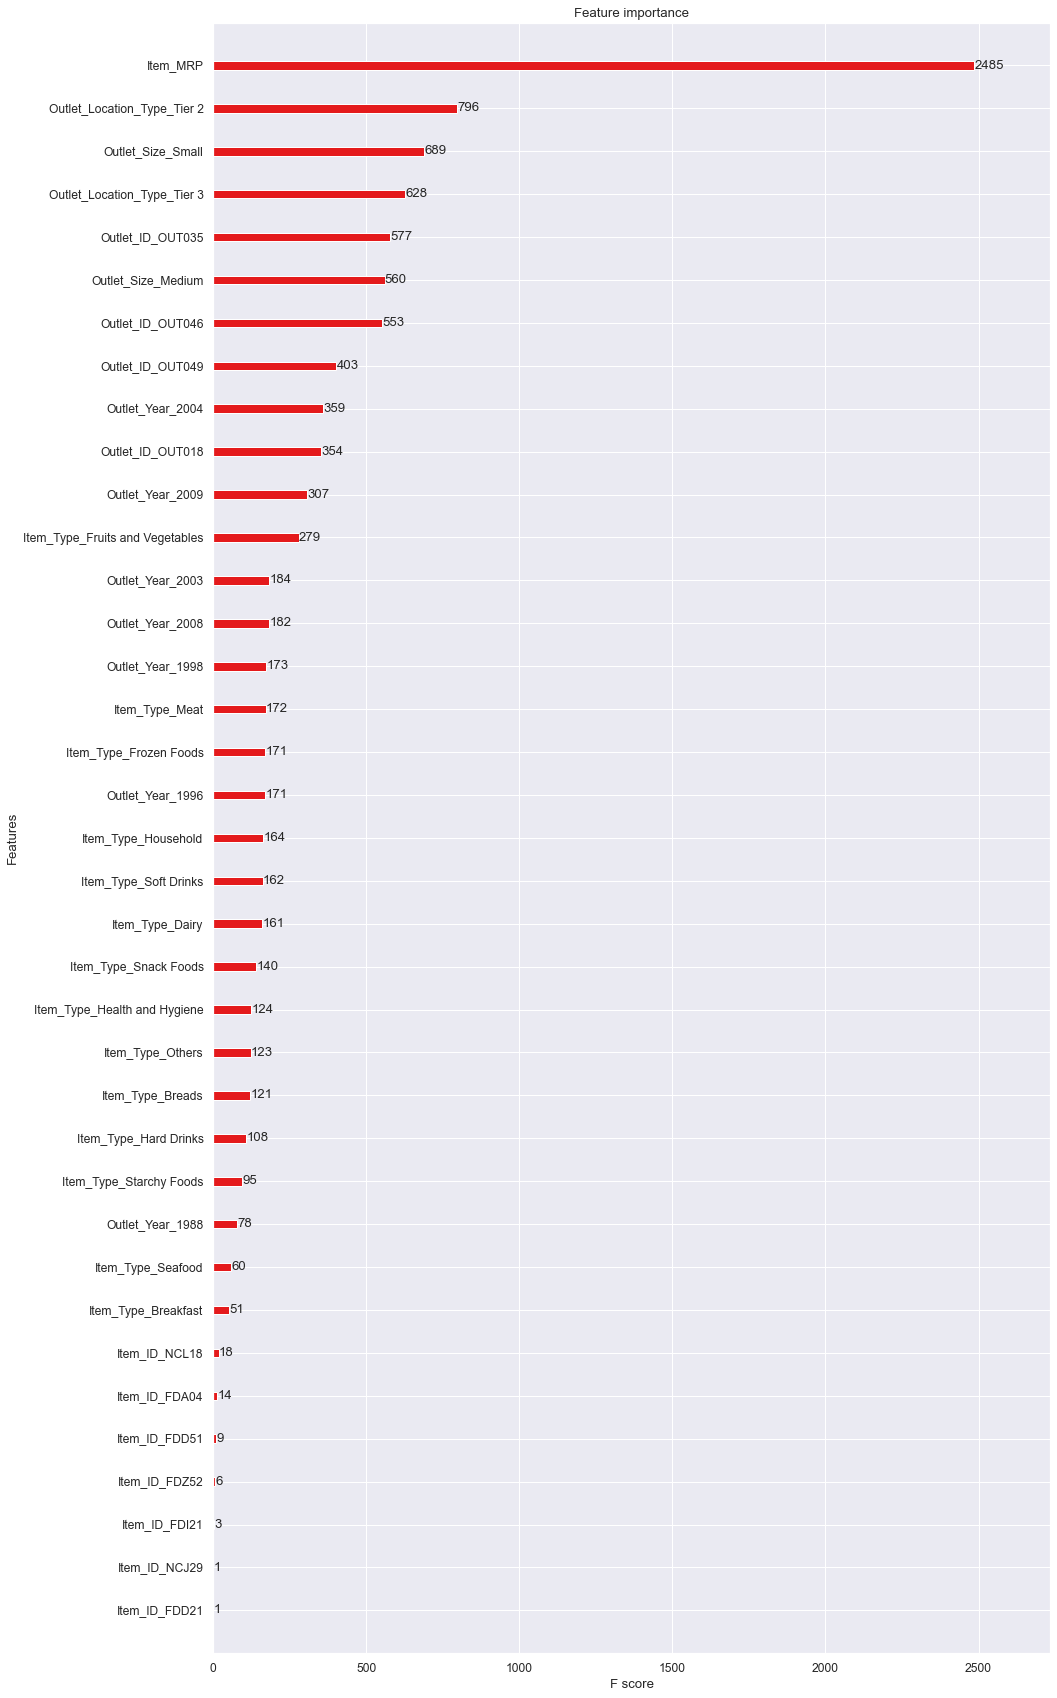

In [ ]:
plt.rcParams["figure.figsize"] = (15, 30)
from xgboost import plot_importance
plot_importance(model, max_num_features=50) # top 10 most important features
plt.show()

In [ ]:
### Lasso Tuning with Optuna ###
RANDOM_SEED = 48

# 10-fold CV
kfolds = KFold(n_splits=10, shuffle=True, random_state=RANDOM_SEED)

def tune(objective):
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=20)

    params = study.best_params
    best_score = study.best_value
    print(f"Best score: {best_score} \nOptimized parameters: {params}")
    return params

In [ ]:
### Lasso ###
### Lasso Tuning with Optuna ###

def lasso_objective(trial):

    _alpha = trial.suggest_float("alpha", 0.001, 10)

    lasso = Lasso(alpha=_alpha, random_state=RANDOM_SEED)

    score = cross_val_score(lasso,X,y, cv=kfolds, scoring="neg_root_mean_squared_error").mean()
    return score

lasso_params = tune(lasso_objective)

[I 2021-11-10 18:30:17,896] A new study created in memory with name: no-name-b9ff4911-2ea6-4d0c-a86b-c41e785cc838
[I 2021-11-10 18:30:27,058] Trial 0 finished with value: -1272.7394191560516 and parameters: {'alpha': 3.9168748102492077}. Best is trial 0 with value: -1272.7394191560516.
[I 2021-11-10 18:30:35,883] Trial 1 finished with value: -1273.0293604491833 and parameters: {'alpha': 4.283938421596574}. Best is trial 0 with value: -1272.7394191560516.
[I 2021-11-10 18:30:46,256] Trial 2 finished with value: -1271.0432847118752 and parameters: {'alpha': 0.9912370261587407}. Best is trial 2 with value: -1271.0432847118752.
[I 2021-11-10 18:30:55,178] Trial 3 finished with value: -1276.7501448752312 and parameters: {'alpha': 9.561952042494934}. Best is trial 2 with value: -1271.0432847118752.
[I 2021-11-10 18:31:04,365] Trial 4 finished with value: -1275.903786058025 and parameters: {'alpha': 8.244900531371671}. Best is trial 2 with value: -1271.0432847118752.
[I 2021-11-10 18:31:16,92

Best score: -1270.91769229347 
Optimized parameters: {'alpha': 0.32858478064448016}


In [ ]:
#lasso+K-fold

oofs = np.zeros(shape=(len(X)))
oof_vanilla = np.zeros(len(X))
preds = np.zeros(test.shape[0])

kf = KFold(n_splits=10,random_state=48,shuffle=True)

rmse=[]  
r2 =[]
n=0

for trn_idx, test_idx in kf.split(X,y):
    X_tr,X_val=X.iloc[trn_idx],X.iloc[test_idx]
    y_tr,y_val=y.iloc[trn_idx],y.iloc[test_idx]
    
    print("⁙" * 10)
    print(f"Fold {n + 1}")
    
    model = Lasso(**lasso_params, random_state=RANDOM_SEED)
    
    vanilla_model = Lasso()
    
    
    model.fit(X_tr,y_tr)
    vanilla_model.fit(X_tr,y_tr)

    pred_y = model.predict(X_val)
    
    p_vanilla = vanilla_model.predict(X_val)
    
    oofs[test_idx] = pred_y
    oof_vanilla[test_idx] = p_vanilla
   
    preds+=model.predict(test)/kf.n_splits
    
    rmse.append(mean_squared_error(y_val, model.predict(X_val), squared=False))
    r2.append(r2_score(y_val, model.predict(X_val)))
   
    
    print("rmse", "=" ,rmse[n])
    print("r2","=" ,r2[n])
    
    n+=1
    
print(f'mean square error on training data (vanilla model): {np.round(mean_squared_error(y, oof_vanilla, squared=False),5)}')    
print(f'mean square error on training data (with tuning): {np.round(mean_squared_error(y, oofs, squared=False),5)}')

print(f'mean rmse: {np.mean(rmse)}')    
print(f'mean r2: {np.mean(r2)}') 

oofs=pd.DataFrame(oofs,columns=['lassoof'])
preds=pd.DataFrame(preds,columns=['lasspred'])

oofs.to_csv('lassoof.csv',index=False)
preds.to_csv('lasspred.csv',index=False)

⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 1
rmse = 1263.9839303738763
r2 = 0.022724582176152586
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 2
rmse = 1275.672572658784
r2 = 0.027266397019238164
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 3
rmse = 1273.300092248925
r2 = 0.022811733326177697
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 4
rmse = 1278.4172241199435
r2 = 0.021474419089128394
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 5
rmse = 1259.1646678040656
r2 = 0.024559743821148894
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 6
rmse = 1280.6431105569945
r2 = 0.02928687013163822
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 7
rmse = 1264.009834621769
r2 = 0.018810045379682228
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 8
rmse = 1276.783782680813
r2 = 0.026412889369676118
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 9
rmse = 1257.1289422855182
r2 = 0.023084176694598835
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 10
rmse = 1280.0727655840135
r2 = 0.028076286247205373
mean square error on training data (vanilla model): 1271.07487
mean square error on training data (with tuning): 1270.94607
mean rmse: 1270.91769229347
mean r2: 0.02445071432546465


In [ ]:
### Ensemble Part-2 ###

In [ ]:
processing_DIR = 'C:\\Users\\pedne\\Python\\Competition\\machinehack\\'

In [ ]:
def process_data(DATA_DIR):
    
    train = pd.read_csv(DATA_DIR+"train.csv")
    test = pd.read_csv(DATA_DIR+"test.csv")
    sub= pd.read_csv(DATA_DIR+"submission.csv")
    
       
    #Removes train rows which has Region_Code not present in test set
    test_Item_ID_list=test['Item_ID'].tolist()
    train=train[train['Item_ID'].isin(test_Item_ID_list)]
    
    train = train[(train['Sales'] >= 0)]
    train = train[(train['Sales'] < 10000)]
     
    target=train[['Sales']]    
        
    lgbmpred = pd.read_csv(DATA_DIR+'lgbmpred.csv')
    xgbpred = pd.read_csv(DATA_DIR+'xgbpred.csv')
    catboostpred = pd.read_csv(DATA_DIR+'cbpred.csv')
    lasspred = pd.read_csv(DATA_DIR+'lasspred.csv')
   
    total_pred = pd.concat([lgbmpred,xgbpred,catboostpred,lasspred], axis=1)
        
    lgbmoof = pd.read_csv(DATA_DIR+'lgbmoof.csv')
    xgboof = pd.read_csv(DATA_DIR+'xgboof.csv')
    catboostoof = pd.read_csv(DATA_DIR+'cboof.csv')
    lassoof = pd.read_csv(DATA_DIR+'lassoof.csv')
        
    total_oof = pd.concat([lgbmoof,xgboof,catboostoof,lassoof], axis=1)
        
    print("len(total_oof) = ", len(total_oof))
    return train,target,sub,test,total_pred,total_oof

In [ ]:
def findbestweight(df1,df2,target):
    min_rmse = 1500
    max_weight = 0
    min_ensemble_oof  = 0
    weights_list = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
    #print("target",target)
    for weight in weights_list:
        ensemble_oof = weight*df1 + (1-weight)*df2
        rmse_score = mean_squared_error(target,ensemble_oof, squared=False)
        if rmse_score < min_rmse:
            min_ensemble_oof = ensemble_oof
            min_rmse = rmse_score
            max_weight = weight
    print("The best weights for blending is {0} with rmse {1}".format(max_weight, min_rmse))
    return max_weight

In [ ]:
def blend_lasso():
    train,target,sub,test,total_pred,total_oof=process_data(processing_DIR)
    
    weight1=findbestweight(total_oof['lgbmoof'],total_oof['xgboof'],target)
    lgbm_xgb=weight1*total_oof['lgbmoof'] + (1-weight1)*total_oof['xgboof']
    
    weight2=findbestweight(lgbm_xgb,total_oof['cboof'],target)
    lgb_xgb_cb=weight2*lgbm_xgb +(1-weight2)*total_oof['cboof']
    
    weight3=findbestweight(lgb_xgb_cb,total_oof['lassoof'],target)
    lgb_xgb_cb_lasso=weight3*lgb_xgb_cb +(1-weight3)*total_oof['lassoof']
    
    lgb_xgb_cb_lasso_pred=((weight1*total_pred['lgbmpred']+(1-weight1)*total_pred['xgbpred'])*weight2+total_pred['cbpred']*(1-weight2))*weight3+total_pred['lasspred']*(1-weight3)
 
    sub['Sales']=lgb_xgb_cb_lasso_pred
    sub.to_csv('part2_pred.csv',index=False)
    print(sub)

In [ ]:
blend_lasso()

len(total_oof) =  87453
The best weights for blending is 0.45 with rmse 1269.5772343102005
The best weights for blending is 0.55 with rmse 1269.2744887854205
The best weights for blending is 1.0 with rmse 1269.2744887854205
             Sales
0      2000.305002
1      1843.873912
2      1811.350822
3      1687.477596
4      1528.707006
5      2006.867187
6      1945.402849
7      2207.458150
8      1769.354088
9      1903.109405
10     1943.473690
11     1609.271569
12     2033.888157
13     1721.493476
14     1901.649212
15     1760.693705
16     1533.422371
17     1519.898283
18     1846.600571
19     1924.205304
20     1898.763782
21     1561.621347
22     1871.451471
23     1932.777343
24     1953.080112
25     2336.436763
26     1792.676194
27     1829.518133
28     1856.867956
29     1512.591121
30     1951.470767
31     1653.680397
32     2055.020772
33     1879.772411
34     2260.702914
35     2287.653653
36     1591.482632
37     1829.918577
38     1947.110389
39     2023.6747

In [ ]:
### Final Ensemble ###

In [ ]:
sub= pd.read_csv("submission.csv")

one = pd.read_csv('part1_pred.csv')
two = pd.read_csv('part2_pred.csv')

total_pred = one["Sales"]*0.5 + two["Sales"]*0.5 

sub['Sales']=total_pred
sub.to_csv('final_prediction.csv',index=False)
sub['Sales'].head()

0    2010.921362
1    1849.549474
2    1818.133444
3    1704.930643
4    1523.358751
Name: Sales, dtype: float64

In [ ]:
### End Of Program ###